# Predicting Car Insurance

#### Author: Rainier Goubault | LinkedIn: https://www.linkedin.com/in/rainiergoubault/

### Introduction:
We have a dataset from one bank in the United States. Besides usual services, this bank also provides car insurance services. The data is related with direct marketing campaigns (phone calls). The bank organizes regular campaigns to attract new clients. The bank has potential customers’ data, and bank’s employees call them for advertising available car insurance options. We are provided with general information about clients (age, job, etc.) as well as more specific information about the current insurance sell campaign (communication, last contact day) and previous campaigns (attributes like previous attempts, outcome). 

#### Objective:

    1. We aim to accomplish building a prediction model that will classify whether customers will buy car insurance or not. 

#### Dataset:
The dataset used can be found at: https://www.kaggle.com/kondla/carinsurance

## Gather the Data

### Import Libraries

In [1]:
# Warning
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation
import numpy as np 
import pandas as pd

# Statistics
from scipy import stats
from scipy.stats import norm, skew
from scipy.stats import mannwhitneyu

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualiation options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set_style('white')

# Set notebook options
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', 100) # display 100 rows

### Load the data

In [2]:
car_insurance_train = pd.read_csv('carInsurance_train.csv', index_col=['Id'], parse_dates=['CallStart', 'CallEnd'])
car_insurance_test = pd.read_csv('carInsurance_test.csv', index_col=['Id'], parse_dates=['CallStart', 'CallEnd'])
df = car_insurance_train.copy()
test = car_insurance_test.copy()
print('The datasets has been successfully imported!')

The datasets has been successfully imported!


In [3]:
df.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,2021-11-09 13:45:20,2021-11-09 13:46:30,0
2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,2021-11-09 14:49:03,2021-11-09 14:52:08,0
3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,2021-11-09 16:30:24,2021-11-09 16:36:04,1
4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,2021-11-09 12:06:43,2021-11-09 12:20:22,1
5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,2021-11-09 14:35:44,2021-11-09 14:38:56,0


In [4]:
print('The number of oberservations in the dataset:', df.shape[0])
print('The number of features in the dataset:', df.shape[1])

The number of oberservations in the dataset: 4000
The number of features in the dataset: 18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Age               4000 non-null   int64         
 1   Job               3981 non-null   object        
 2   Marital           4000 non-null   object        
 3   Education         3831 non-null   object        
 4   Default           4000 non-null   int64         
 5   Balance           4000 non-null   int64         
 6   HHInsurance       4000 non-null   int64         
 7   CarLoan           4000 non-null   int64         
 8   Communication     3098 non-null   object        
 9   LastContactDay    4000 non-null   int64         
 10  LastContactMonth  4000 non-null   object        
 11  NoOfContacts      4000 non-null   int64         
 12  DaysPassed        4000 non-null   int64         
 13  PrevAttempts      4000 non-null   int64         
 14  Outcome           958 no

#### Constants

In [6]:
constants = df.nunique()
constants = [i for i, v in enumerate(constants) if v == 1]
constants

[]

#### Unique Values

In [7]:
uniques = df.nunique()
uniques

Age                   70
Job                   11
Marital                3
Education              3
Default                2
Balance             2178
HHInsurance            2
CarLoan                2
Communication          2
LastContactDay        31
LastContactMonth      12
NoOfContacts          35
DaysPassed           330
PrevAttempts          20
Outcome                3
CallStart           3777
CallEnd             3764
CarInsurance           2
dtype: int64

#### Duplicate data

In [8]:
duplicates = df.duplicated()
duplicates.any()

False

#### Missing data

In [9]:
missing = df.isna()
missing.any()

Age                 False
Job                  True
Marital             False
Education            True
Default             False
Balance             False
HHInsurance         False
CarLoan             False
Communication        True
LastContactDay      False
LastContactMonth    False
NoOfContacts        False
DaysPassed          False
PrevAttempts        False
Outcome              True
CallStart           False
CallEnd             False
CarInsurance        False
dtype: bool

In [10]:
def missing_data(df):
    # Get missing values
    missing = df.isna()
    # Calcualte the total number of missing values
    total_missing = missing.sum().sort_values(ascending=False)
    # Calculate the percentage of missing values
    percent_missing = 100 * (total_missing / missing.count()).sort_values(ascending=False)
    # Combine results into dataframe
    missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total Missing', 'Percent Missing'])
    
    return missing_data

missing = missing_data(df)
missing

,Total Missing,Percent Missing
Outcome,3042,76.050
Communication,902,22.550
Education,169,4.225
Job,19,0.475
Age,0,0.000
NoOfContacts,0,0.000
CallEnd,0,0.000
CallStart,0,0.000
PrevAttempts,0,0.000
DaysPassed,0,0.000


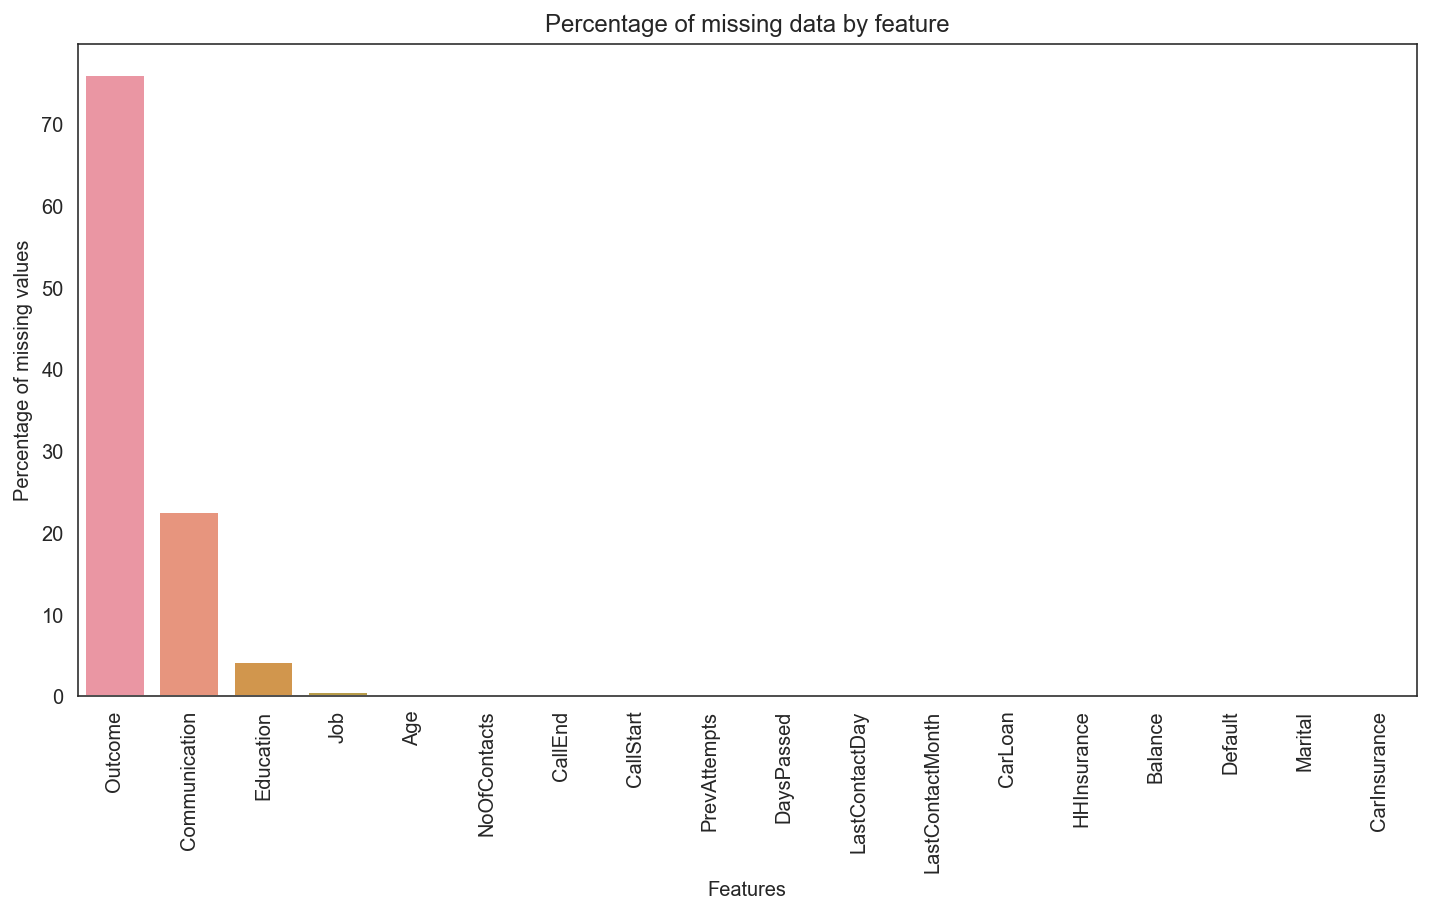

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(x=missing.index, y=missing['Percent Missing'])
plt.title('Percentage of missing data by feature')
plt.xlabel('Features')
plt.ylabel('Percentage of missing values')
plt.xticks(rotation=90);

In [12]:
df[df['Job'].isna()].head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
28,45,NaN,divorced,NaN,0,0,0,0,cellular,21,apr,3,-1,0,NaN,2021-11-09 12:33:22,2021-11-09 12:38:00,1
240,41,NaN,single,NaN,0,942,0,0,cellular,27,oct,1,188,1,success,2021-11-09 16:39:43,2021-11-09 16:42:06,1
487,54,NaN,married,primary,0,981,0,0,cellular,22,aug,12,-1,0,NaN,2021-11-09 11:31:36,2021-11-09 11:42:27,0
537,33,NaN,single,secondary,0,1522,0,1,cellular,19,nov,1,-1,0,NaN,2021-11-09 12:44:40,2021-11-09 13:00:46,0
606,53,NaN,married,primary,0,732,0,0,cellular,27,oct,2,-1,0,NaN,2021-11-09 09:01:01,2021-11-09 09:13:40,1


In [13]:
df[df['Education'].isna()].head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
15,25,services,single,NaN,0,2022,0,0,cellular,29,jul,8,97,12,other,2021-11-09 14:15:09,2021-11-09 14:19:45,1
28,45,NaN,divorced,NaN,0,0,0,0,cellular,21,apr,3,-1,0,NaN,2021-11-09 12:33:22,2021-11-09 12:38:00,1
51,54,services,divorced,NaN,0,0,1,0,cellular,16,apr,1,-1,0,NaN,2021-11-09 16:18:17,2021-11-09 16:22:40,0
54,78,retired,married,NaN,0,3208,0,0,telephone,20,may,3,-1,0,NaN,2021-11-09 16:00:27,2021-11-09 16:06:18,1
59,34,management,single,NaN,0,6013,1,0,cellular,18,may,1,-1,0,NaN,2021-11-09 13:52:00,2021-11-09 14:02:12,1


In [14]:
df[df['Communication'].isna()].head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,2021-11-09 14:49:03,2021-11-09 14:52:08,0
8,35,management,divorced,tertiary,0,538,1,0,NaN,12,may,4,-1,0,NaN,2021-11-09 15:39:43,2021-11-09 15:40:49,0
14,38,self-employed,divorced,secondary,0,2674,1,0,NaN,19,jun,2,-1,0,NaN,2021-11-09 10:29:56,2021-11-09 10:32:39,0
21,57,blue-collar,married,secondary,0,773,1,1,NaN,18,jun,8,-1,0,NaN,2021-11-09 09:05:50,2021-11-09 09:07:27,0
29,34,services,married,secondary,0,-62,1,0,NaN,16,jun,3,-1,0,NaN,2021-11-09 13:50:40,2021-11-09 13:52:29,0


In [15]:
df[df['Outcome'].isna()].head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,2021-11-09 13:45:20,2021-11-09 13:46:30,0
2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,2021-11-09 14:49:03,2021-11-09 14:52:08,0
4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,2021-11-09 12:06:43,2021-11-09 12:20:22,1
5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,2021-11-09 14:35:44,2021-11-09 14:38:56,0
7,37,admin.,single,tertiary,0,1000,1,0,cellular,17,mar,1,-1,0,NaN,2021-11-09 13:00:02,2021-11-09 13:03:17,1


    As we see, the dataset has some missing values: 
    - 'Job' and 'Education' is probably missing because the customer didn't specify this information
    - 'Communication' is missing because the bank didn't specify the communication type
    - 'Outcome' has missing because some customers haven't been offered anything before, so there is no outcome.

    We will fill our missing values later.

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4000.0,41.21475,11.550194,18.0,32.0,39.0,49.0,95.0
Default,4000.0,0.01450,0.119555,0.0,0.0,0.0,0.0,1.0
Balance,4000.0,1532.93725,3511.452489,-3058.0,111.0,551.5,1619.0,98417.0
HHInsurance,4000.0,0.49275,0.500010,0.0,0.0,0.0,1.0,1.0
CarLoan,4000.0,0.13300,0.339617,0.0,0.0,0.0,0.0,1.0
LastContactDay,4000.0,15.72125,8.425307,1.0,8.0,16.0,22.0,31.0
NoOfContacts,4000.0,2.60725,3.064204,1.0,1.0,2.0,3.0,43.0
DaysPassed,4000.0,48.70650,106.685385,-1.0,-1.0,-1.0,-1.0,854.0
PrevAttempts,4000.0,0.71750,2.078647,0.0,0.0,0.0,0.0,58.0
CarInsurance,4000.0,0.40100,0.490162,0.0,0.0,0.0,1.0,1.0


In [17]:
obj_dtype_cols = ['Default', 'HHInsurance', 'CarLoan', 'LastContactDay']

for feature in obj_dtype_cols:
    df[feature] = df[feature].astype('object')

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4000.0,41.21475,11.550194,18.0,32.0,39.0,49.0,95.0
Balance,4000.0,1532.93725,3511.452489,-3058.0,111.0,551.5,1619.0,98417.0
NoOfContacts,4000.0,2.60725,3.064204,1.0,1.0,2.0,3.0,43.0
DaysPassed,4000.0,48.70650,106.685385,-1.0,-1.0,-1.0,-1.0,854.0
PrevAttempts,4000.0,0.71750,2.078647,0.0,0.0,0.0,0.0,58.0
CarInsurance,4000.0,0.40100,0.490162,0.0,0.0,0.0,1.0,1.0


In [19]:
df.describe(include='object').T

,count,unique,top,freq
Job,3981,11,management,893
Marital,4000,3,married,2304
Education,3831,3,secondary,1988
Default,4000,2,0,3942
HHInsurance,4000,2,0,2029
CarLoan,4000,2,0,3468
Communication,3098,2,cellular,2831
LastContactDay,4000,31,18,203
LastContactMonth,4000,12,may,1049
Outcome,958,3,failure,437


## Exploratory Data Analysis

In [20]:
df.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,2021-11-09 13:45:20,2021-11-09 13:46:30,0
2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,2021-11-09 14:49:03,2021-11-09 14:52:08,0
3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,2021-11-09 16:30:24,2021-11-09 16:36:04,1
4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,2021-11-09 12:06:43,2021-11-09 12:20:22,1
5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,2021-11-09 14:35:44,2021-11-09 14:38:56,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Age               4000 non-null   int64         
 1   Job               3981 non-null   object        
 2   Marital           4000 non-null   object        
 3   Education         3831 non-null   object        
 4   Default           4000 non-null   object        
 5   Balance           4000 non-null   int64         
 6   HHInsurance       4000 non-null   object        
 7   CarLoan           4000 non-null   object        
 8   Communication     3098 non-null   object        
 9   LastContactDay    4000 non-null   object        
 10  LastContactMonth  4000 non-null   object        
 11  NoOfContacts      4000 non-null   int64         
 12  DaysPassed        4000 non-null   int64         
 13  PrevAttempts      4000 non-null   int64         
 14  Outcome           958 no

In [22]:
df.dtypes.nunique()

3

In [23]:
df.dtypes.value_counts()

object            10
int64              6
datetime64[ns]     2
dtype: int64

### Target Feature

In [24]:
df['CarInsurance'].describe()

count    4000.000000
mean        0.401000
std         0.490162
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: CarInsurance, dtype: float64

In [25]:
df['CarInsurance'].value_counts()

0    2396
1    1604
Name: CarInsurance, dtype: int64

In [26]:
df['CarInsurance'].value_counts(normalize=True) * 100

0    59.9
1    40.1
Name: CarInsurance, dtype: float64

In [27]:
non_sub_count = df['CarInsurance'].value_counts()[0]
non_sub_percent = df['CarInsurance'].value_counts(normalize=True)[0] * 100
print(f'The number of customer who did not subscribe to insurance: {non_sub_count}')
print(f'The percentage of customers who did not subscibe to insurance: {round(non_sub_percent, 2)} %')

The number of customer who did not subscribe to insurance: 2396
The percentage of customers who did not subscibe to insurance: 59.9 %


In [28]:
sub_count = df['CarInsurance'].value_counts()[1]
sub_percent = df['CarInsurance'].value_counts(normalize=True)[1] * 100
print(f'Number of cutomers who subscribed to insurance: {sub_count}')
print(f'Percentage of customers who subscribed to insurance: {round(sub_percent, 2)} %')

Number of cutomers who subscribed to insurance: 1604
Percentage of customers who subscribed to insurance: 40.1 %


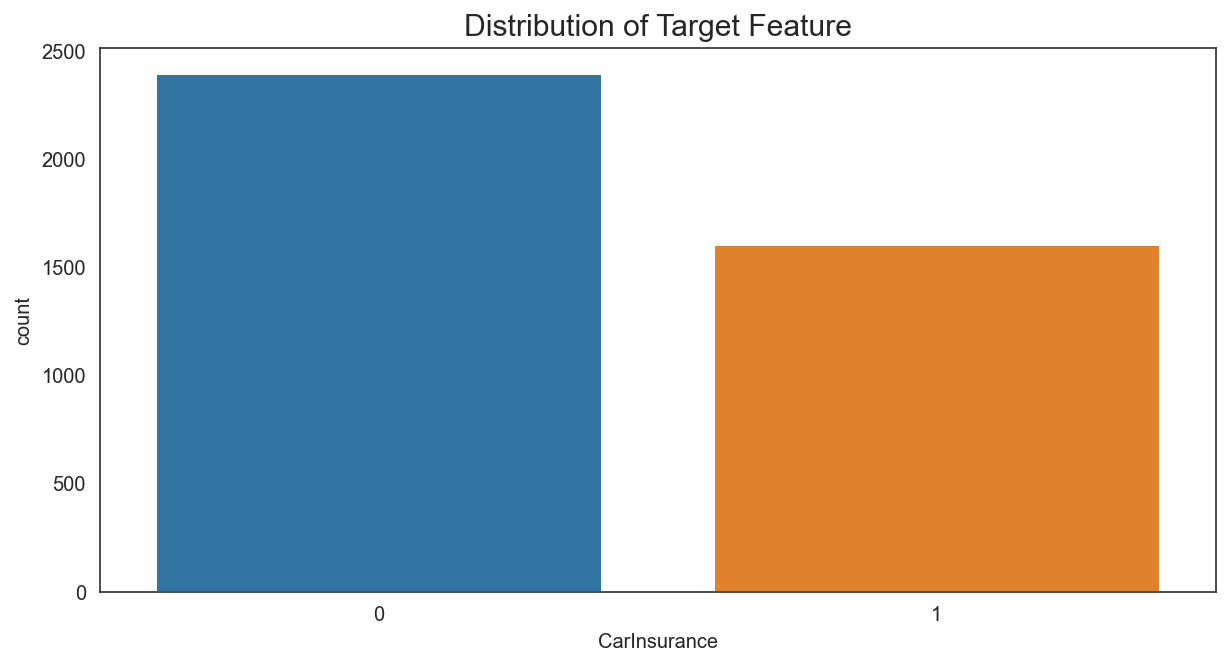

In [29]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Target Feature', size=15)
sns.countplot(df['CarInsurance'].dropna());

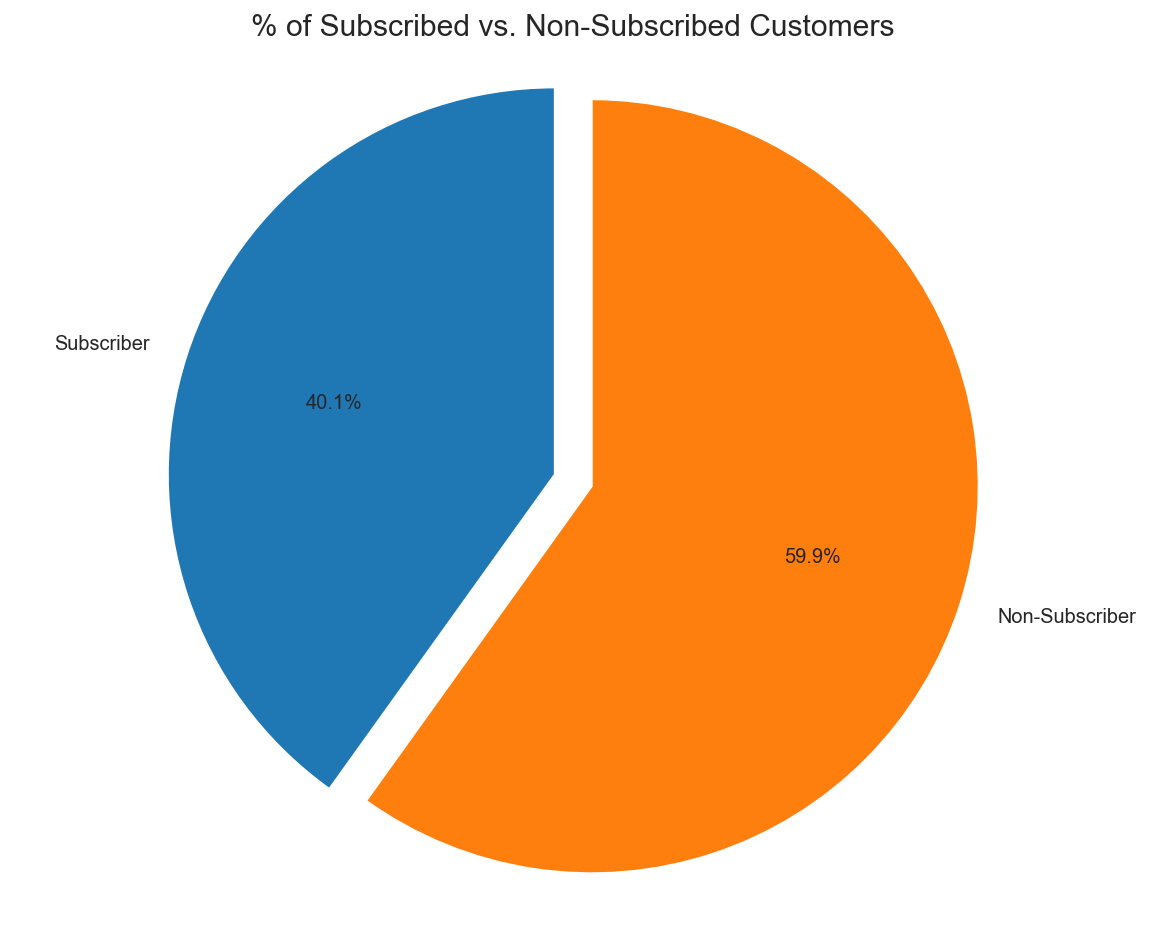

In [30]:
labels = 'Subscriber', 'Non-Subscriber'
sizes = [df.CarInsurance[df['CarInsurance']==1].count(), df.CarInsurance[df['CarInsurance']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
plt.title('% of Subscribed vs. Non-Subscribed Customers', size=15)
plt.show()

### Numerical Features

In [31]:
# Get numerical features
num_cols = df.select_dtypes(include='number').columns

In [32]:
print('The number of numerical features are:', len(num_cols))

The number of numerical features are: 6


In [33]:
print('The numerical features are:\n', num_cols)

The numerical features are:
 Index(['Age', 'Balance', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'CarInsurance'],
      dtype='object')


In [34]:
df[num_cols].head()

,Age,Balance,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
Id,,,,,,
1,32,1218,2,-1,0,0
2,32,1156,5,-1,0,0
3,29,637,1,119,1,1
4,25,373,2,-1,0,1
5,30,2694,1,-1,0,0


#### Summary Statistics

In [35]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4000.0,41.21475,11.550194,18.0,32.0,39.0,49.0,95.0
Balance,4000.0,1532.93725,3511.452489,-3058.0,111.0,551.5,1619.0,98417.0
NoOfContacts,4000.0,2.60725,3.064204,1.0,1.0,2.0,3.0,43.0
DaysPassed,4000.0,48.70650,106.685385,-1.0,-1.0,-1.0,-1.0,854.0
PrevAttempts,4000.0,0.71750,2.078647,0.0,0.0,0.0,0.0,58.0
CarInsurance,4000.0,0.40100,0.490162,0.0,0.0,0.0,1.0,1.0


#### Distributions

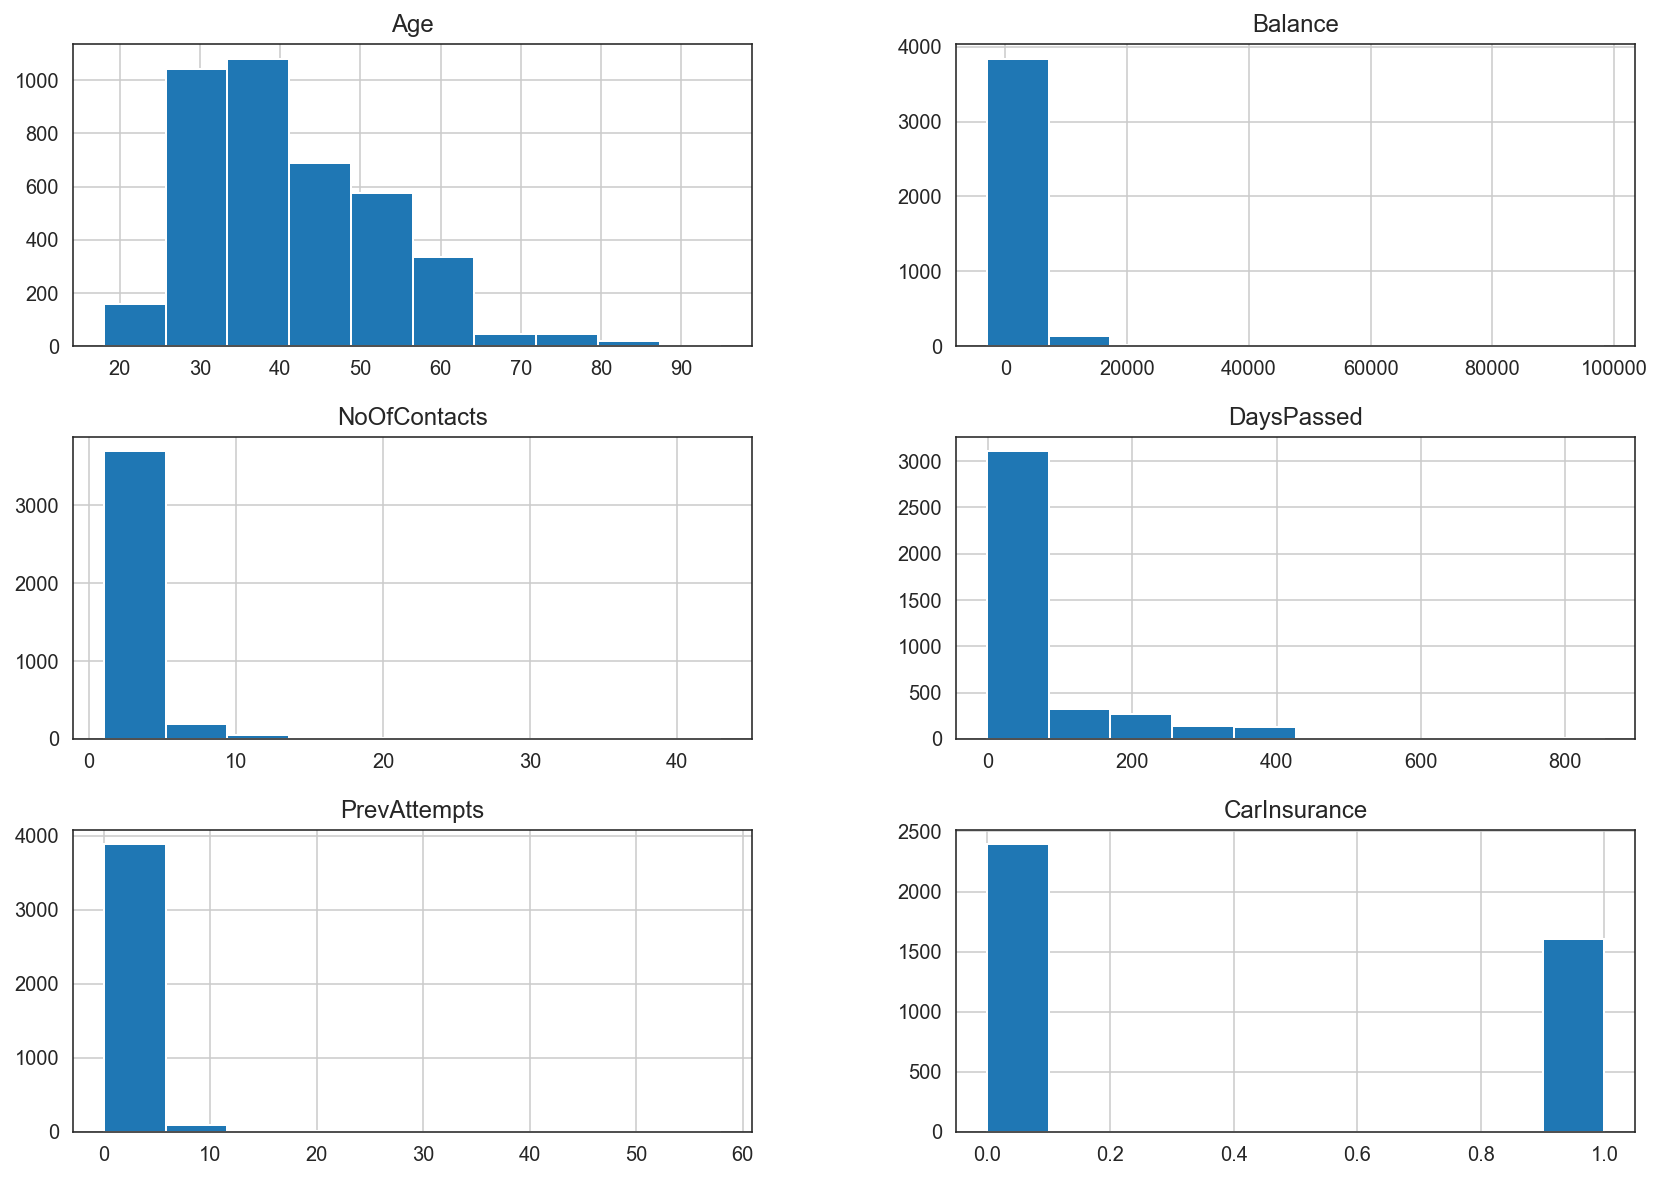

In [36]:
df[num_cols].hist(figsize=(14, 10));

In [37]:
df[num_cols].skew()

Age             0.763293
Balance         9.877895
NoOfContacts    5.241314
DaysPassed      2.536872
PrevAttempts    8.932735
CarInsurance    0.404150
dtype: float64

In [38]:
df[num_cols].kurt()

Age               0.492527
Balance         185.055975
NoOfContacts     40.191337
DaysPassed        7.537368
PrevAttempts    170.039968
CarInsurance     -1.837582
dtype: float64

#### Distribution vs. Target Feature

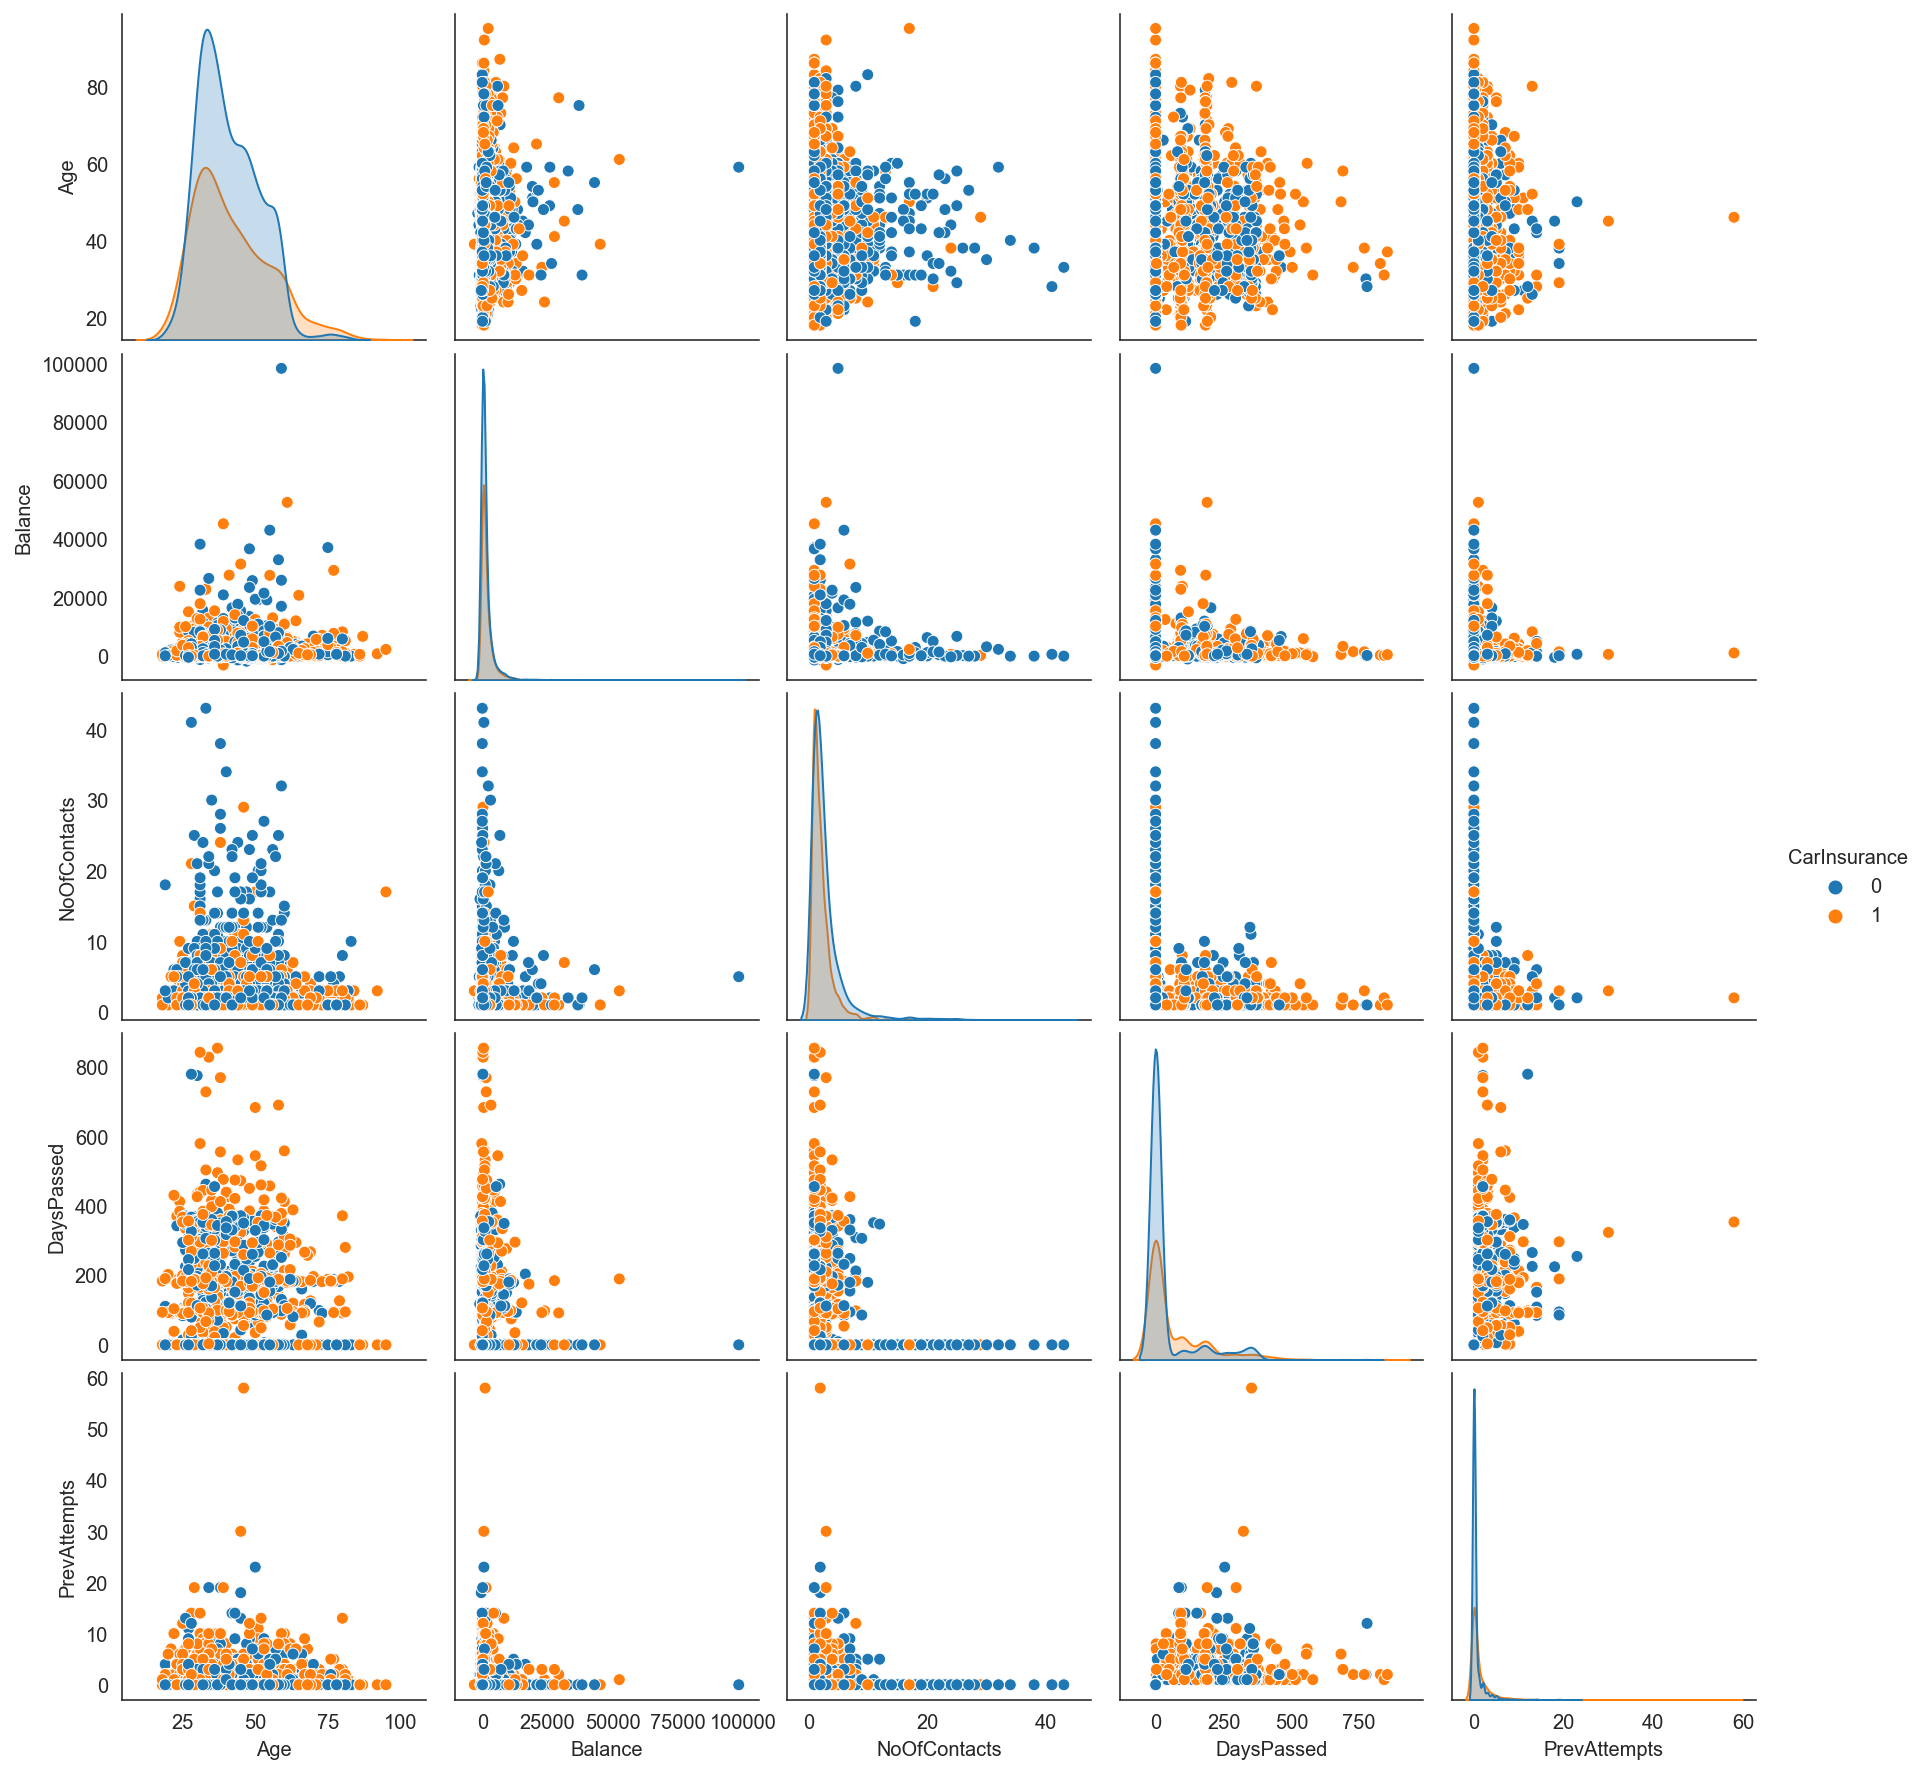

In [39]:
sns.pairplot(data=df[num_cols], hue='CarInsurance');

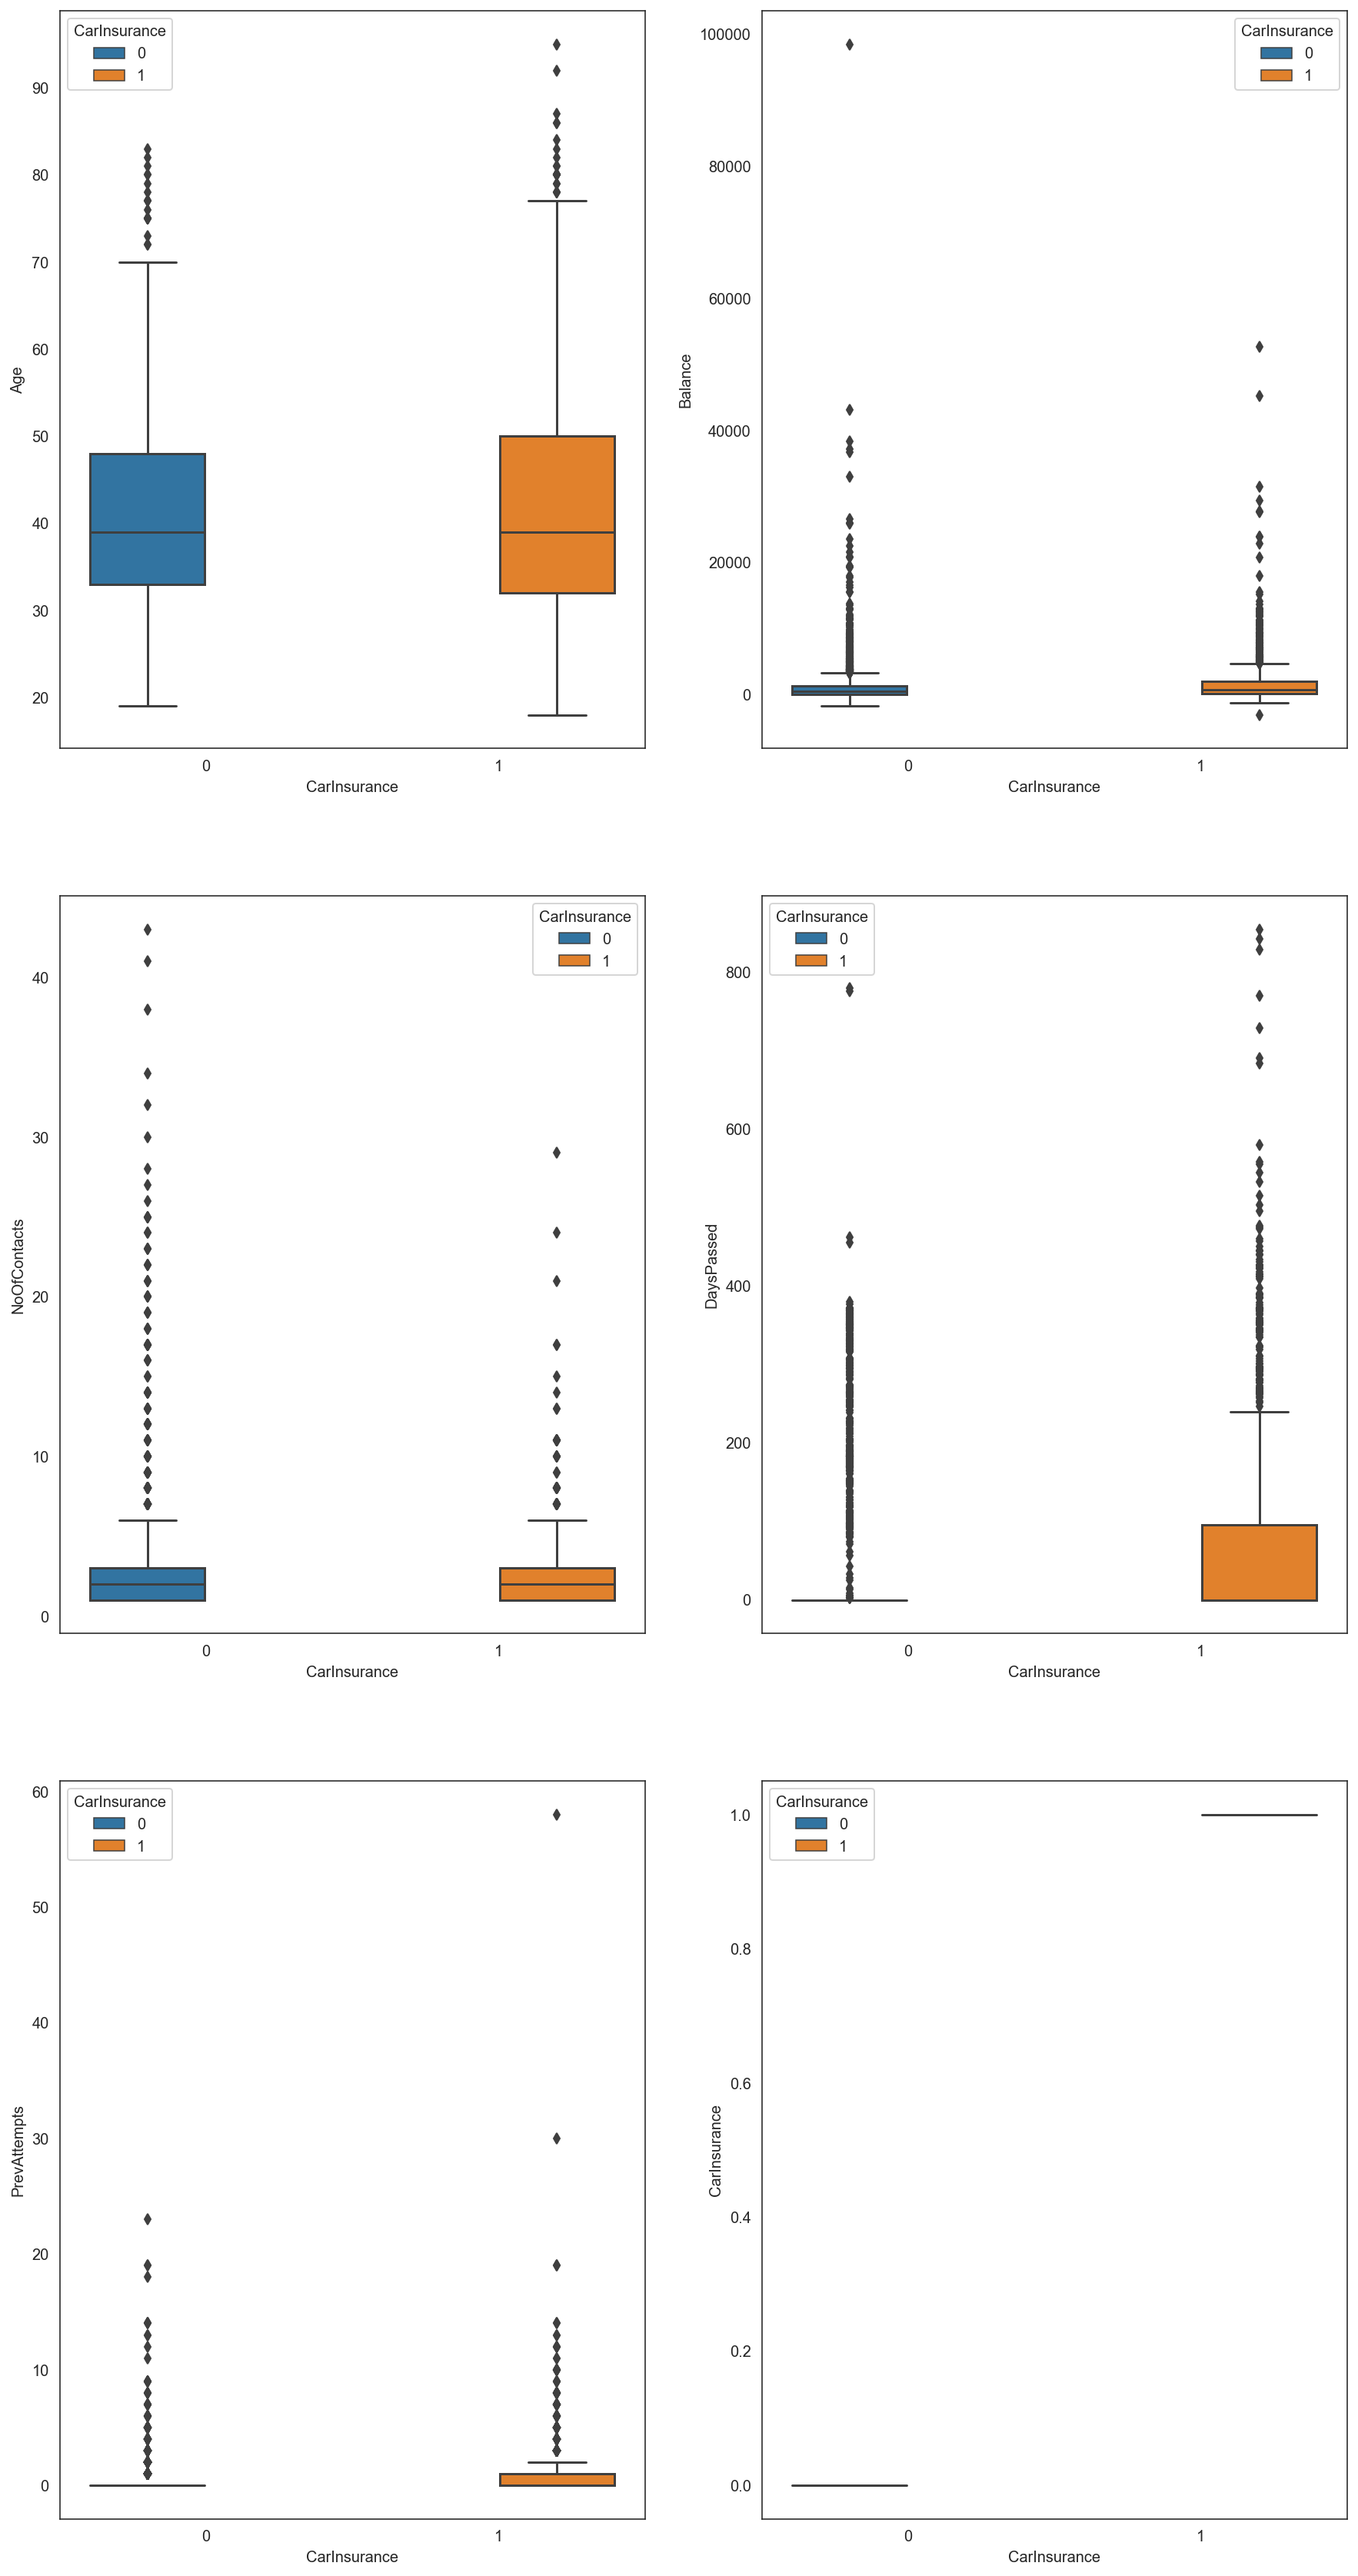

In [40]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 30))

for idx, col in  enumerate(df[num_cols]):
    sns.boxplot(data=df[num_cols], x='CarInsurance', y=col, hue='CarInsurance', ax=ax[idx // 2, idx % 2])
    ax[idx // 2, idx % 2].set_xlabel('CarInsurance')
    ax[idx // 2, idx % 2].set_ylabel(col)

#### Relationship vs Target Feature

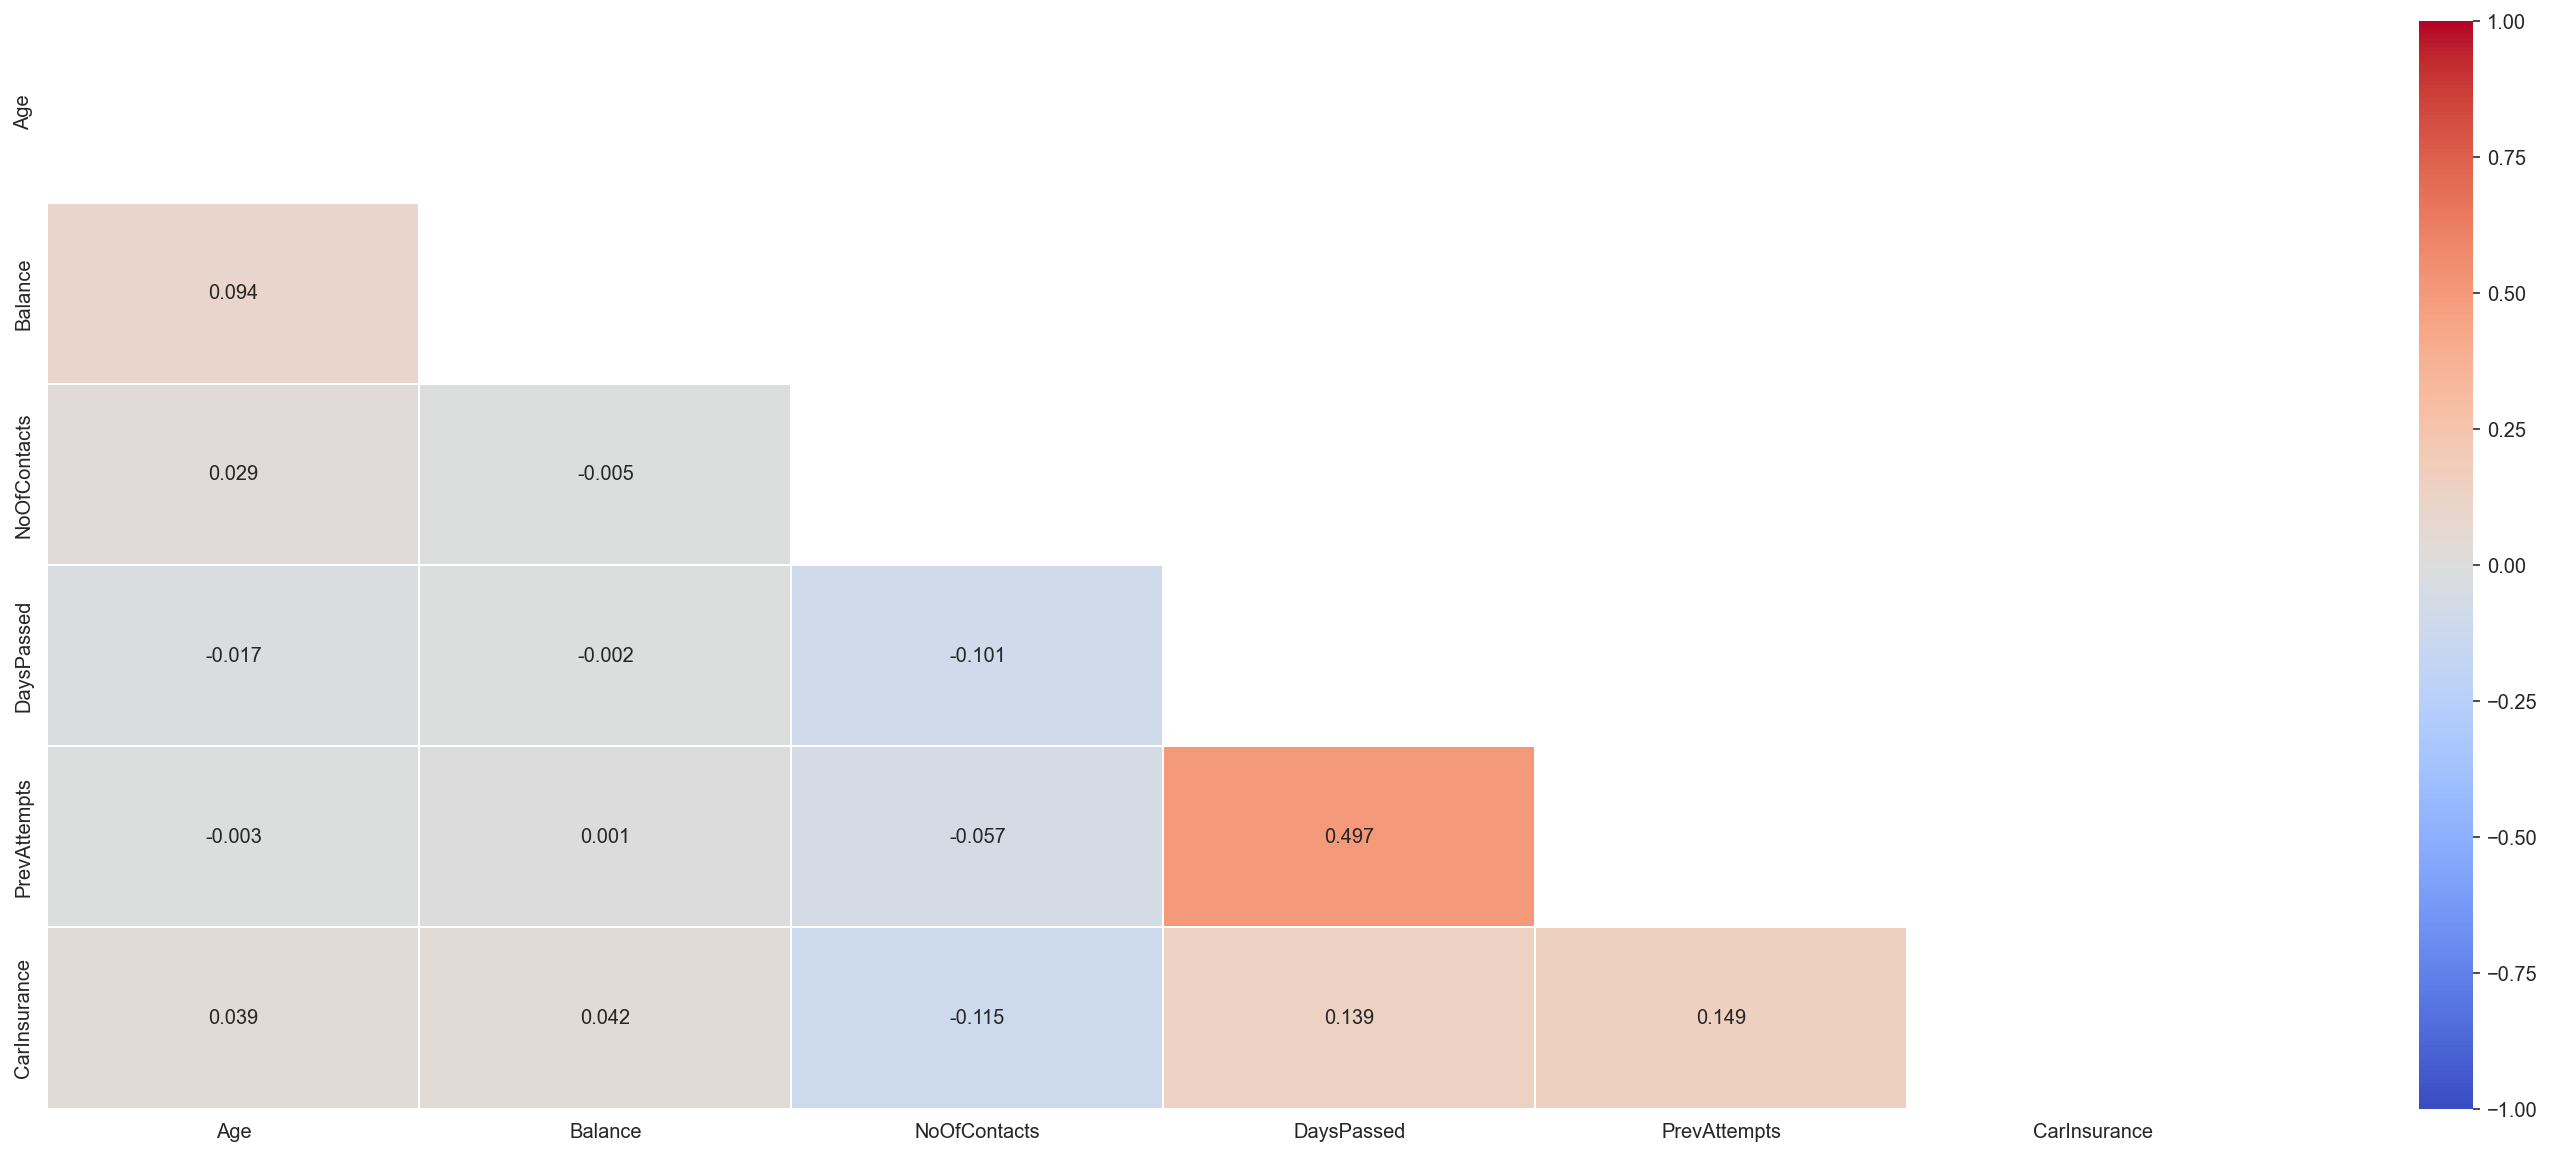

In [41]:
plt.figure(figsize=(25, 10))

corr_matrix = df[num_cols].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

ax = sns.heatmap(corr_matrix, 
                 mask=mask, 
                 xticklabels=corr_matrix.columns, 
                 yticklabels=corr_matrix.columns, 
                 annot=True,
                 fmt='.3f',
                 linewidths=.2, 
                 cmap='coolwarm', 
                 vmin=-1, vmax=1);

### Categorical Features

In [42]:
# Get categorical features
cat_cols = df.select_dtypes(include='object').columns

In [43]:
print('The number of categorical features are:', len(cat_cols))

The number of categorical features are: 10


In [44]:
print('The categorical features are:\n', cat_cols)

The categorical features are:
 Index(['Job', 'Marital', 'Education', 'Default', 'HHInsurance', 'CarLoan',
       'Communication', 'LastContactDay', 'LastContactMonth', 'Outcome'],
      dtype='object')


In [45]:
df[cat_cols].head()

,Job,Marital,Education,Default,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,Outcome
Id,,,,,,,,,,
1,management,single,tertiary,0,1,0,telephone,28,jan,NaN
2,blue-collar,married,primary,0,1,0,NaN,26,may,NaN
3,management,single,tertiary,0,1,0,cellular,3,jun,failure
4,student,single,primary,0,1,0,cellular,11,may,NaN
5,management,married,tertiary,0,0,0,cellular,3,jun,NaN


#### Statistical Summary

In [46]:
df[cat_cols].describe().T

,count,unique,top,freq
Job,3981,11,management,893
Marital,4000,3,married,2304
Education,3831,3,secondary,1988
Default,4000,2,0,3942
HHInsurance,4000,2,0,2029
CarLoan,4000,2,0,3468
Communication,3098,2,cellular,2831
LastContactDay,4000,31,18,203
LastContactMonth,4000,12,may,1049
Outcome,958,3,failure,437


#### Distributions

In [47]:
for feature in cat_cols:
    print('Feature Name:', feature)
    print()
    print('The number of unique values are:', df[feature].nunique())
    print()
    print('The unique values are:\n', df[feature].unique())
    print()
    print(f'{feature} Frequency Table (Counts)')
    print()
    print(df[feature].value_counts()) 
    print()
    print(30 * '-')
    print()
    print(f'{feature} Frequency Table (Percentage)')
    print()
    print(df[feature].value_counts(normalize=True) * 100)
    print()
    print(100 * '-')
    print()

Feature Name: Job

The number of unique values are: 11

The unique values are:
 ['management' 'blue-collar' 'student' 'technician' 'admin.' 'services'
 'self-employed' 'retired' nan 'housemaid' 'entrepreneur' 'unemployed']

Job Frequency Table (Counts)

management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
Name: Job, dtype: int64

------------------------------

Job Frequency Table (Percentage)

management       22.431550
blue-collar      19.065561
technician       16.578749
admin.           11.529766
services          8.289375
retired           6.254710
self-employed     3.516704
student           3.290630
unemployed        3.265511
entrepreneur      3.039437
housemaid         2.738006
Name: Job, dtype: float64

----------------------------------------------------------------------------------------------------

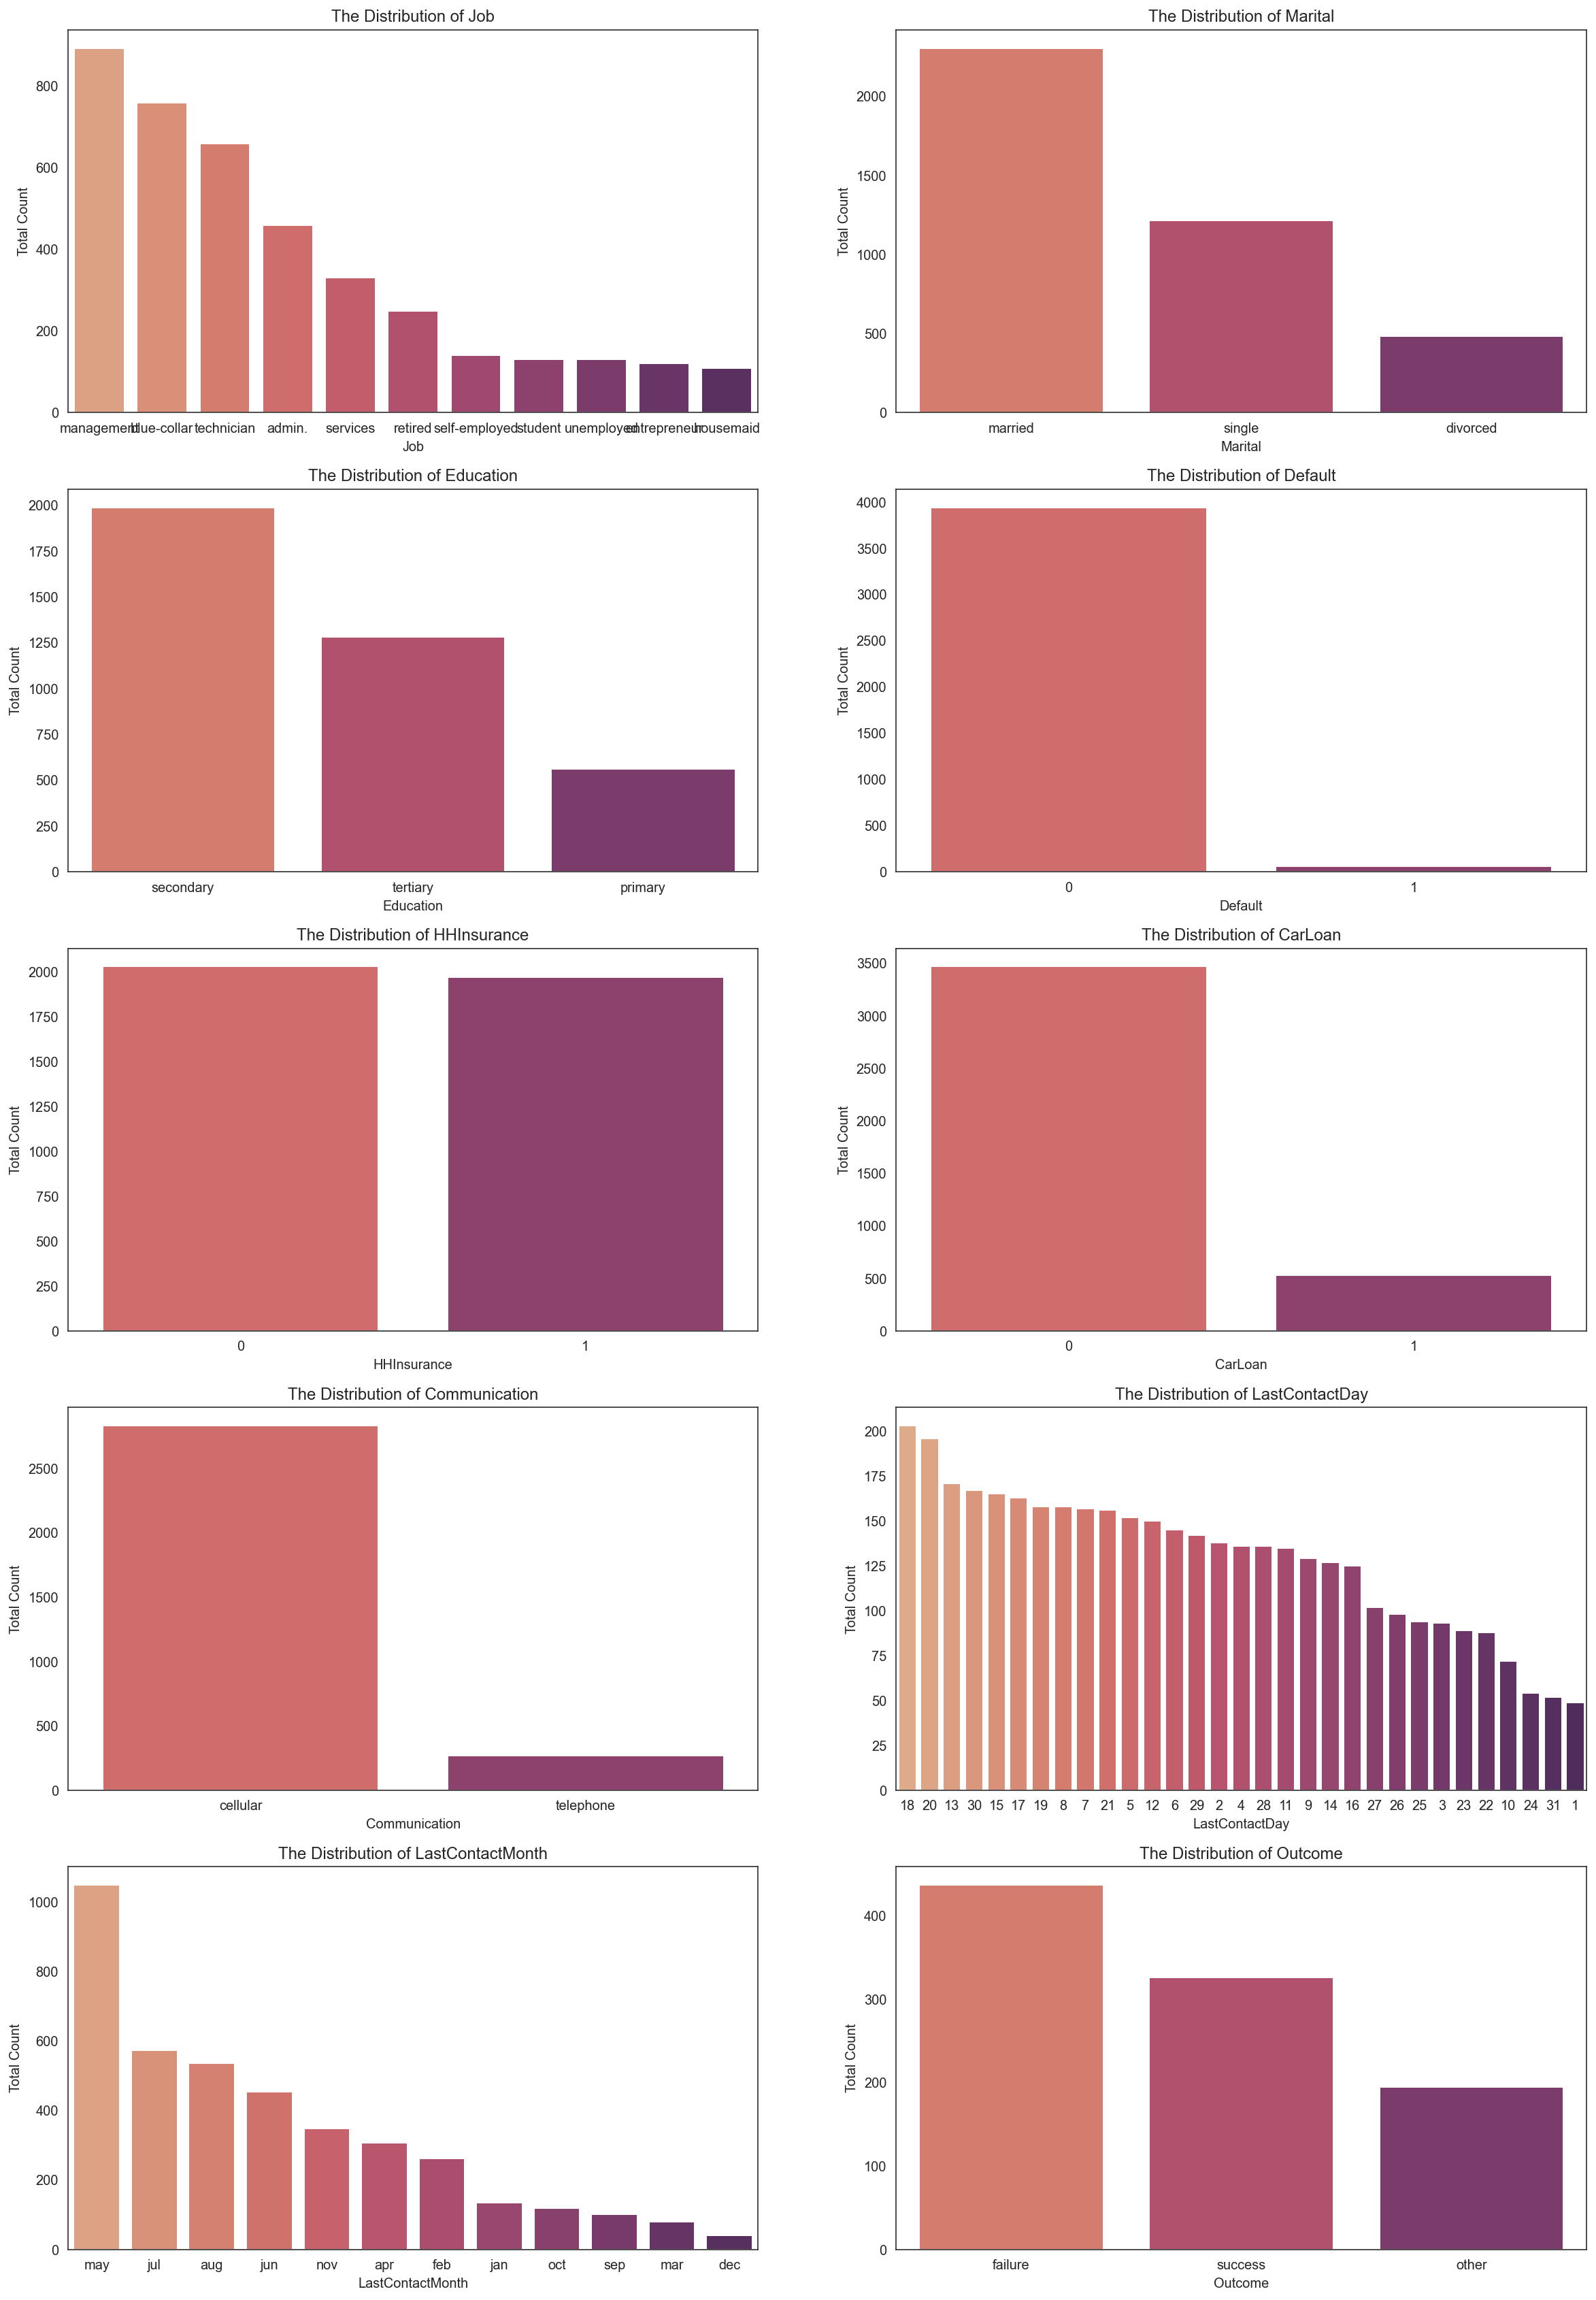

In [48]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))

for idx, feature in enumerate(cat_cols):
    sns.countplot(data=df[cat_cols], x=feature, palette='flare', order=df[feature].value_counts().index, ax=ax[idx // 2, idx % 2])
    ax[idx // 2, idx % 2].set_xlabel(feature)
    ax[idx // 2, idx % 2].set_ylabel('Total Count')
    ax[idx // 2, idx % 2].set_title(f'The Distribution of {feature}')  

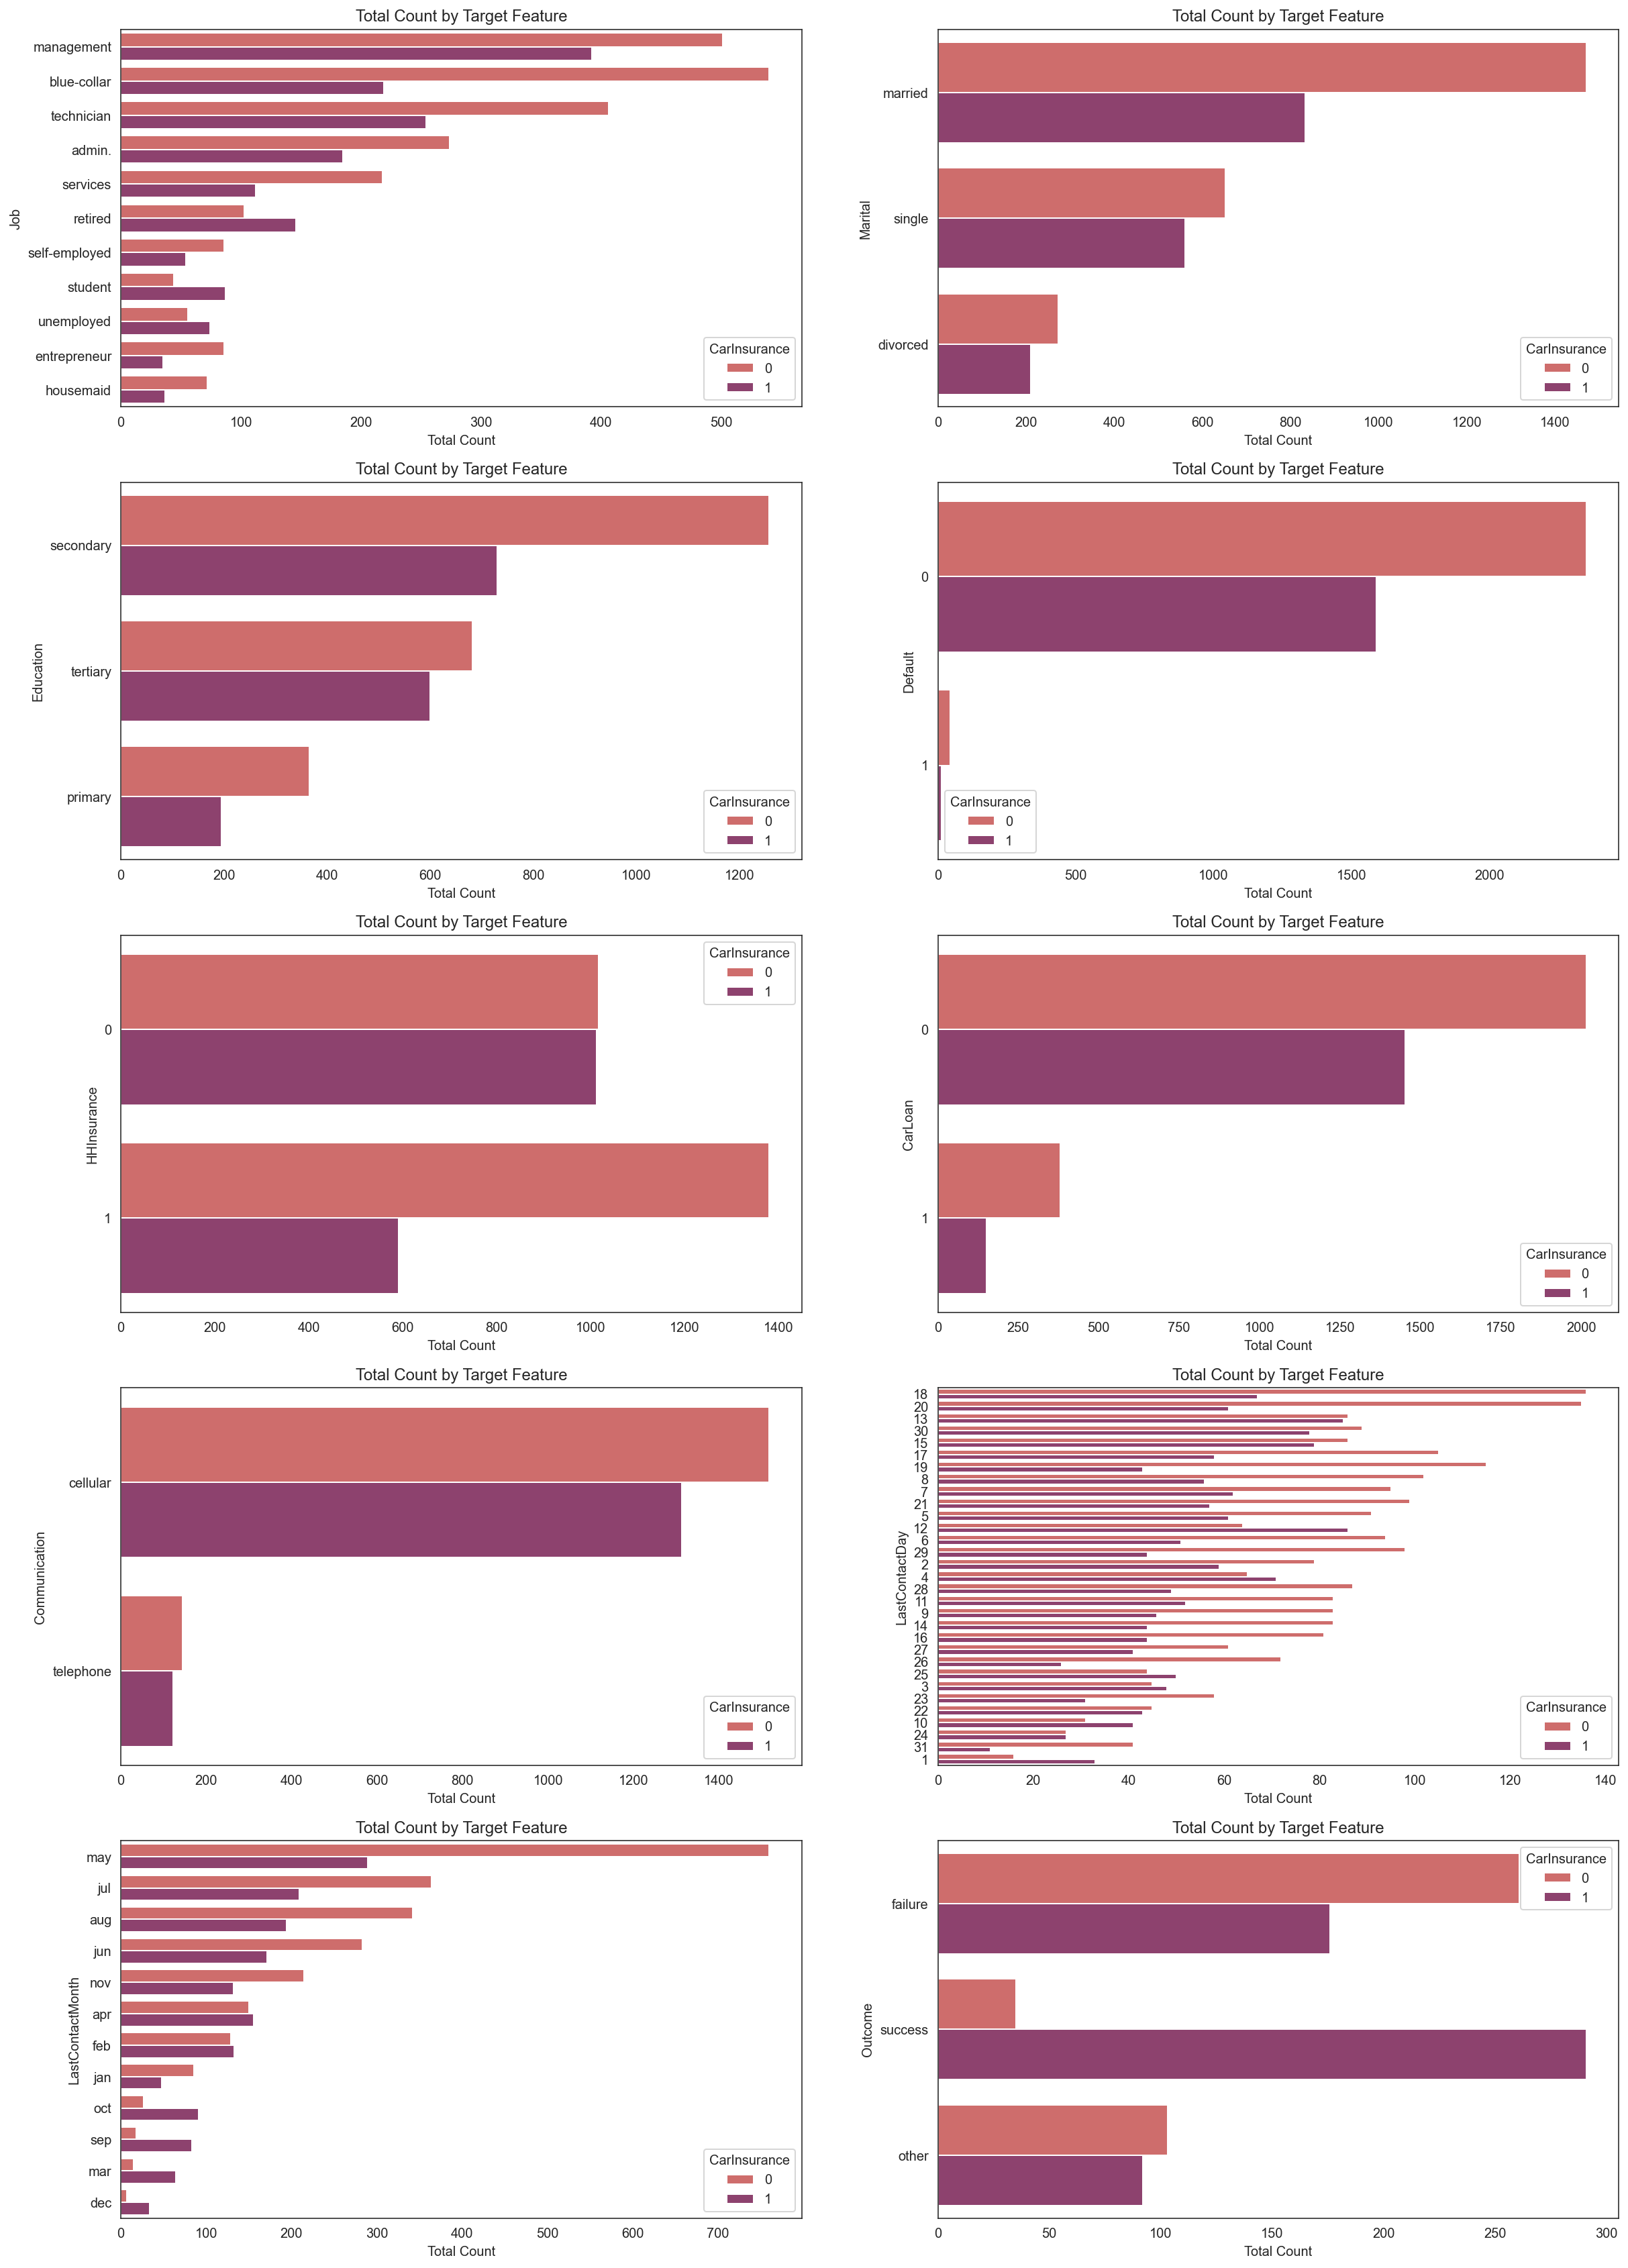

In [49]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))

for idx, feature in enumerate(cat_cols):
    sns.countplot(data=df[cat_cols], y=feature, hue=df['CarInsurance'], palette='flare', order=df[feature].value_counts().index, ax=ax[idx // 2, idx % 2])
    ax[idx // 2, idx % 2].set_xlabel('Total Count')
    ax[idx // 2, idx % 2].set_ylabel(feature)
    ax[idx // 2, idx % 2].set_title(f'Total Count by Target Feature')

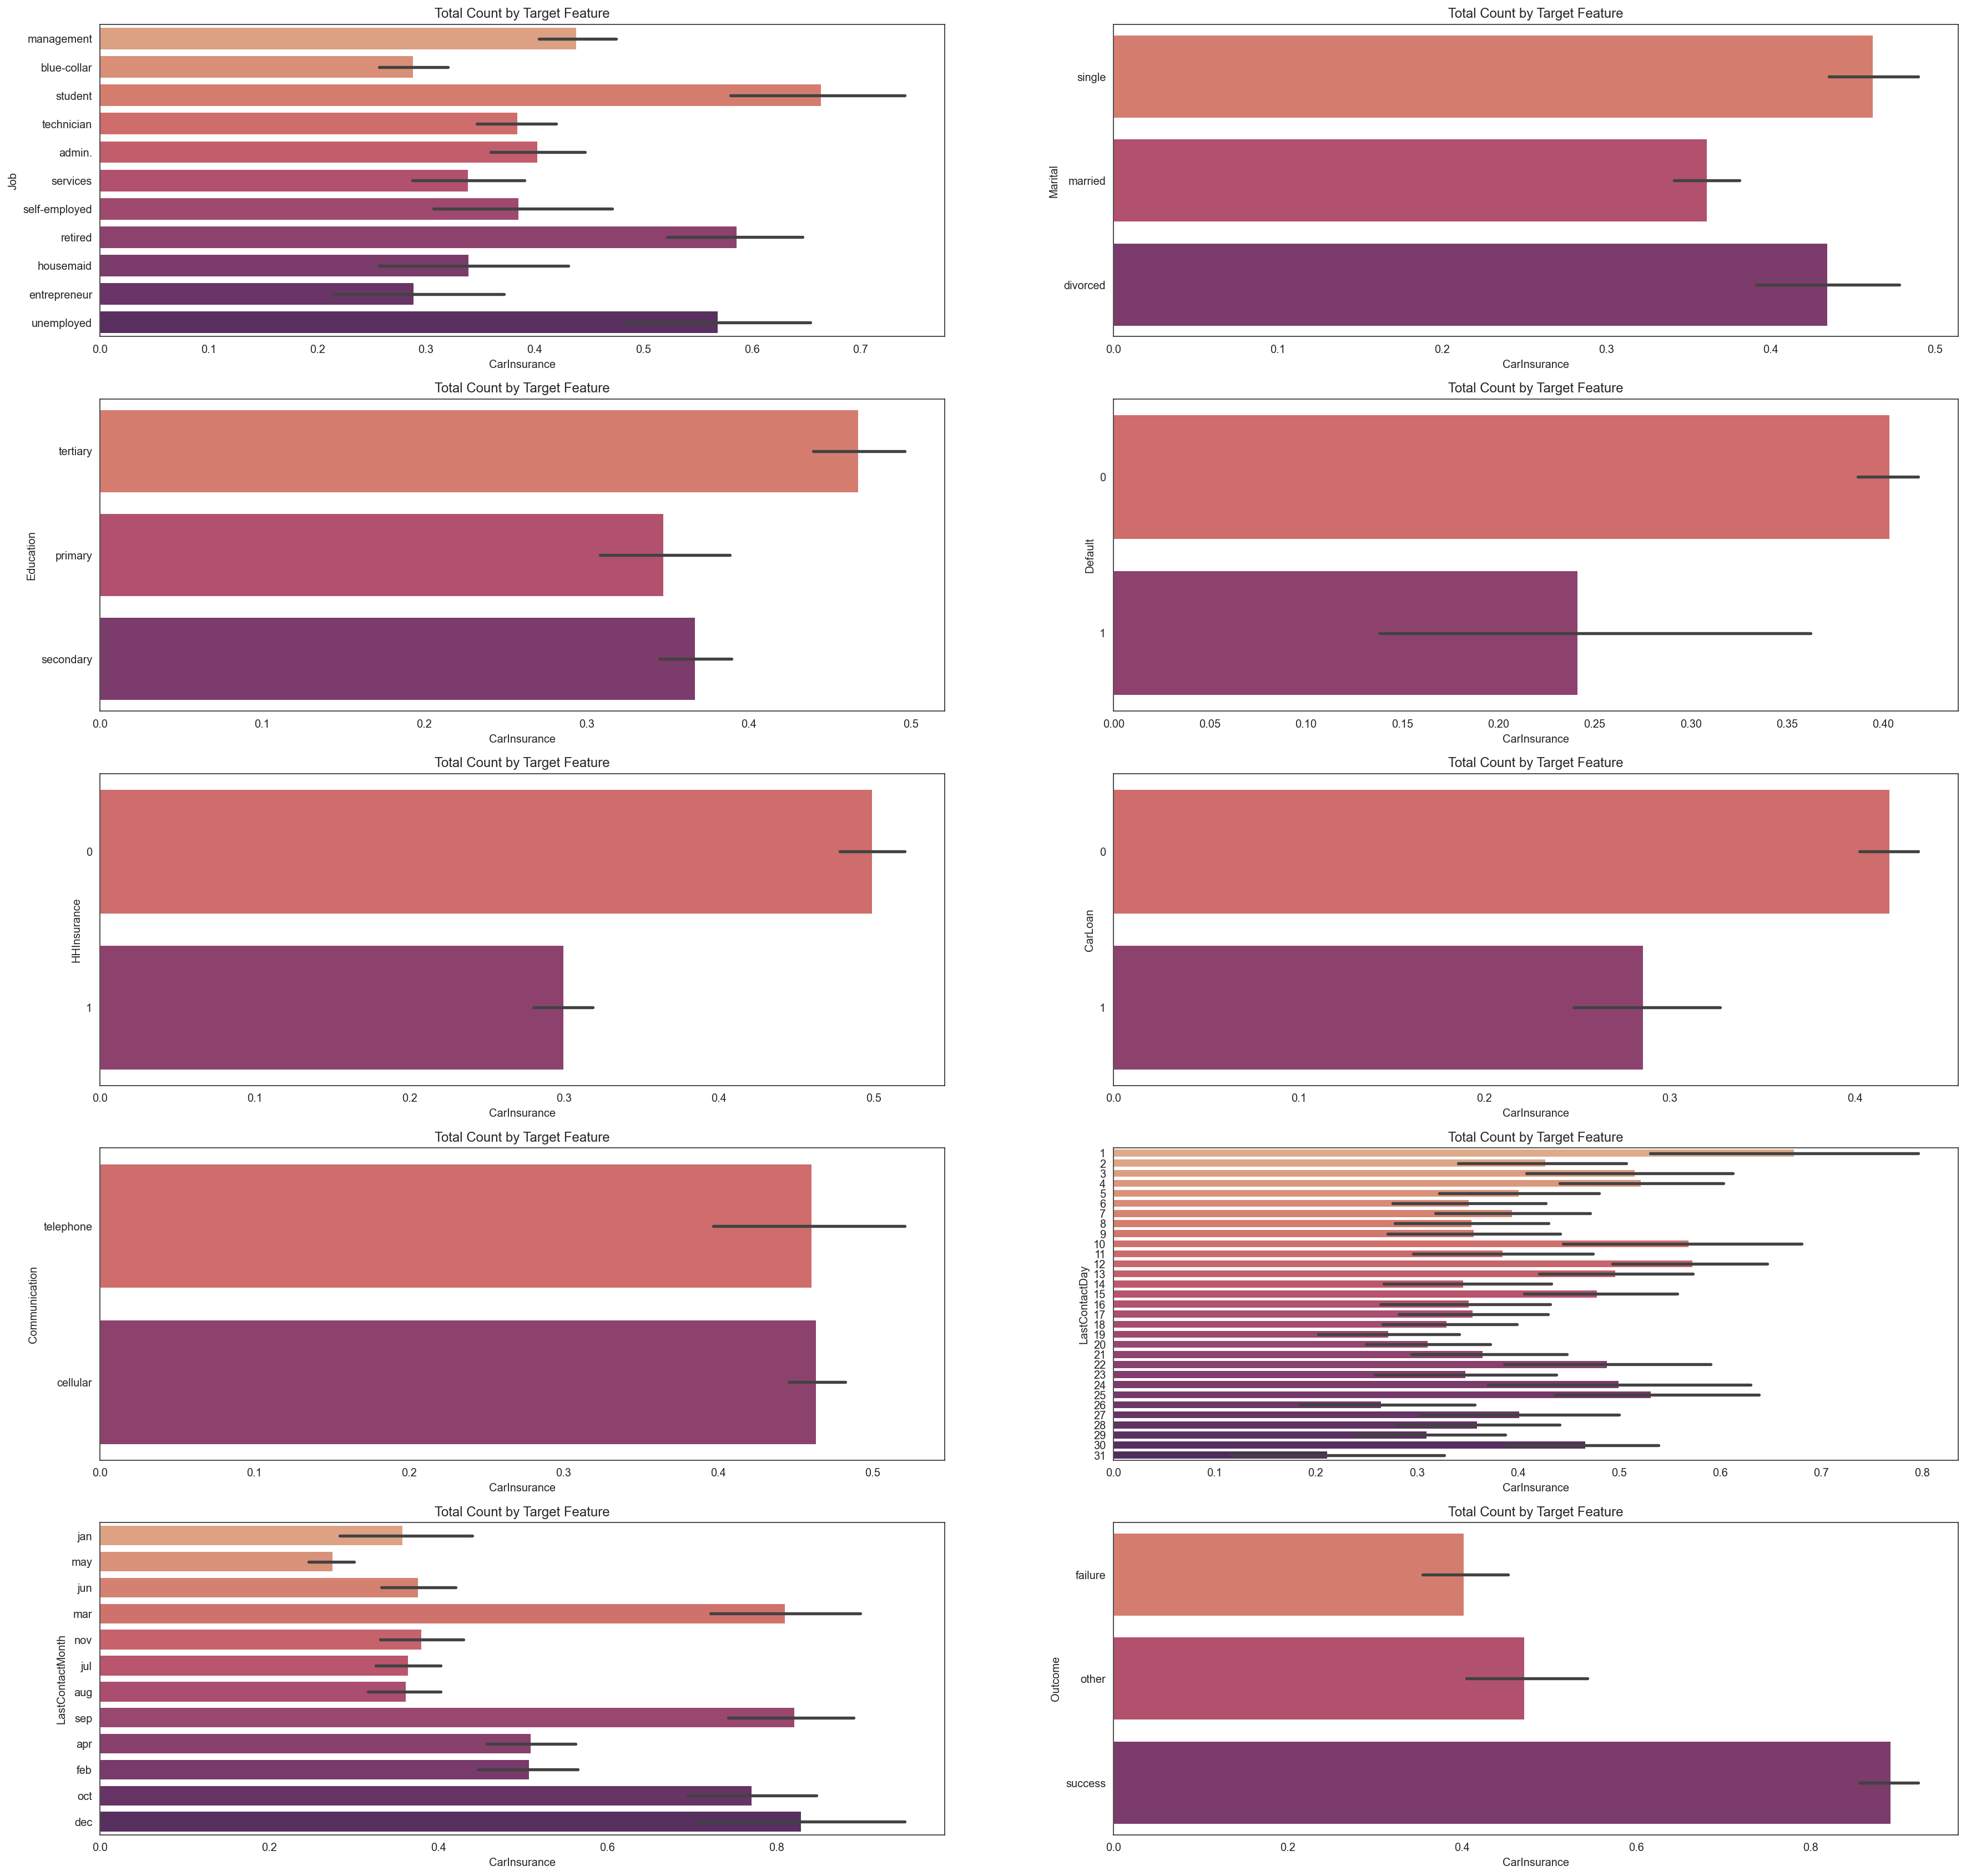

In [50]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))

for idx, feature in enumerate(cat_cols):
    sns.barplot(data=df[cat_cols], x=df['CarInsurance'], y=feature, palette='flare', orient='h', ax=ax[idx // 2, idx % 2])
    ax[idx // 2, idx % 2].set_ylabel(feature)
    ax[idx // 2, idx % 2].set_title(f'Total Count by Target Feature')

## Metric Selection

    The target feature 'CarInsurance' is imbalanced, so we'll use 'roc-auc' metric for model evaluation. We'll also take a look at the 'classification_report', 'precision' and 'recall' metrics on the test set.

## Model Selection

    We will try seven different classifer models:
    - Logistic Regression
    - SupportVectorMachine
    - KNeighbors
    - AdaBoost
    - ExtraTrees
    - GradientBoosting 
    - Random Forest

## Data Preparation

In [51]:
# Preprocessing 
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, OrdinalEncoder

# Model Evaluation
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score

# Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, precision_score, recall_score

# Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [52]:
df = car_insurance_train.copy()
df.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,2021-11-09 13:45:20,2021-11-09 13:46:30,0
2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,2021-11-09 14:49:03,2021-11-09 14:52:08,0
3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,2021-11-09 16:30:24,2021-11-09 16:36:04,1
4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,2021-11-09 12:06:43,2021-11-09 12:20:22,1
5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,2021-11-09 14:35:44,2021-11-09 14:38:56,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Age               4000 non-null   int64         
 1   Job               3981 non-null   object        
 2   Marital           4000 non-null   object        
 3   Education         3831 non-null   object        
 4   Default           4000 non-null   int64         
 5   Balance           4000 non-null   int64         
 6   HHInsurance       4000 non-null   int64         
 7   CarLoan           4000 non-null   int64         
 8   Communication     3098 non-null   object        
 9   LastContactDay    4000 non-null   int64         
 10  LastContactMonth  4000 non-null   object        
 11  NoOfContacts      4000 non-null   int64         
 12  DaysPassed        4000 non-null   int64         
 13  PrevAttempts      4000 non-null   int64         
 14  Outcome           958 no

In [54]:
df.shape

(4000, 18)

In [55]:
X = df.drop(['CallStart', 'CallEnd', 'CarInsurance'], axis=1)
y = df['CarInsurance']
print('The shape of X:', X.shape)
print('The shape of y:', y.shape)

The shape of X: (4000, 15)
The shape of y: (4000,)


In [56]:
num_selector = selector(dtype_exclude=object)
num_cols = num_selector(X)

cat_selector = selector(dtype_include=object)
cat_cols = cat_selector(X)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=999)

## Modeling

In [58]:
# Define data preprocessing tools
imp = SimpleImputer(strategy='constant', fill_value='unknown')
ohe = OneHotEncoder(handle_unknown='ignore')

# Define cat preprocessing
cat_preprocessor = Pipeline([
    ('impute', imp),
    ('ohe_encode', ohe)
])

# Combine num and cat preprocessing
ct = ColumnTransformer([
    ('cat', cat_preprocessor, cat_cols)],
    remainder = 'passthrough')

# Define Models
models = [DummyClassifier(strategy='constant', random_state=999, constant=1),
          LogisticRegression(solver='liblinear', random_state=999),
          SVC(random_state=999),
          KNeighborsClassifier(),
          AdaBoostClassifier(random_state=999),
          ExtraTreesClassifier(random_state=999),
          RandomForestClassifier(random_state=999),
          GradientBoostingClassifier(random_state=999)]

scores = []
model_name = []

for model in models:
    # Define model pipeline
    pipe = Pipeline([('preprocessing', ct), ('model', model)])
    # Fit model pipeline
    pipe.fit(X_train, y_train)
    # Predict model pipeline
    y_pred = pipe.predict(X_test)
    # Append name of model and scores 
    model_name.append(model.__class__.__name__)
    scores.append(({
        'Accuracy': round(accuracy_score(y_test, y_pred) * 100, 3),
        'ROC-AUC': round(roc_auc_score(y_test, y_pred) * 100, 3),
        'Precision': round(precision_score(y_test, y_pred) * 100, 3),
        'Recall': round(recall_score(y_test, y_pred) * 100, 3)
    })) 
    # Print model and score 
    print(f'Model: {model} and the test ROC-AUC score: {round(roc_auc_score(y_test, y_pred) * 100 , 3)}%')

Model: DummyClassifier(constant=1, random_state=999, strategy='constant') and the test ROC-AUC score: 50.0%
Model: LogisticRegression(random_state=999, solver='liblinear') and the test ROC-AUC score: 67.14%
Model: SVC(random_state=999) and the test ROC-AUC score: 51.08%
Model: KNeighborsClassifier() and the test ROC-AUC score: 53.931%
Model: AdaBoostClassifier(random_state=999) and the test ROC-AUC score: 66.262%
Model: ExtraTreesClassifier(random_state=999) and the test ROC-AUC score: 66.793%
Model: RandomForestClassifier(random_state=999) and the test ROC-AUC score: 67.634%
Model: GradientBoostingClassifier(random_state=999) and the test ROC-AUC score: 67.599%


In [59]:
testohe_results = pd.DataFrame(data=scores, columns=['Accuracy', 'ROC-AUC', 'Precision', 'Recall'], index=model_name)
testohe_results.sort_values(by=['ROC-AUC'], ascending=False, inplace=True)

<AxesSubplot:title={'center':'Model Comparison'}, xlabel='ROC-AUC'>

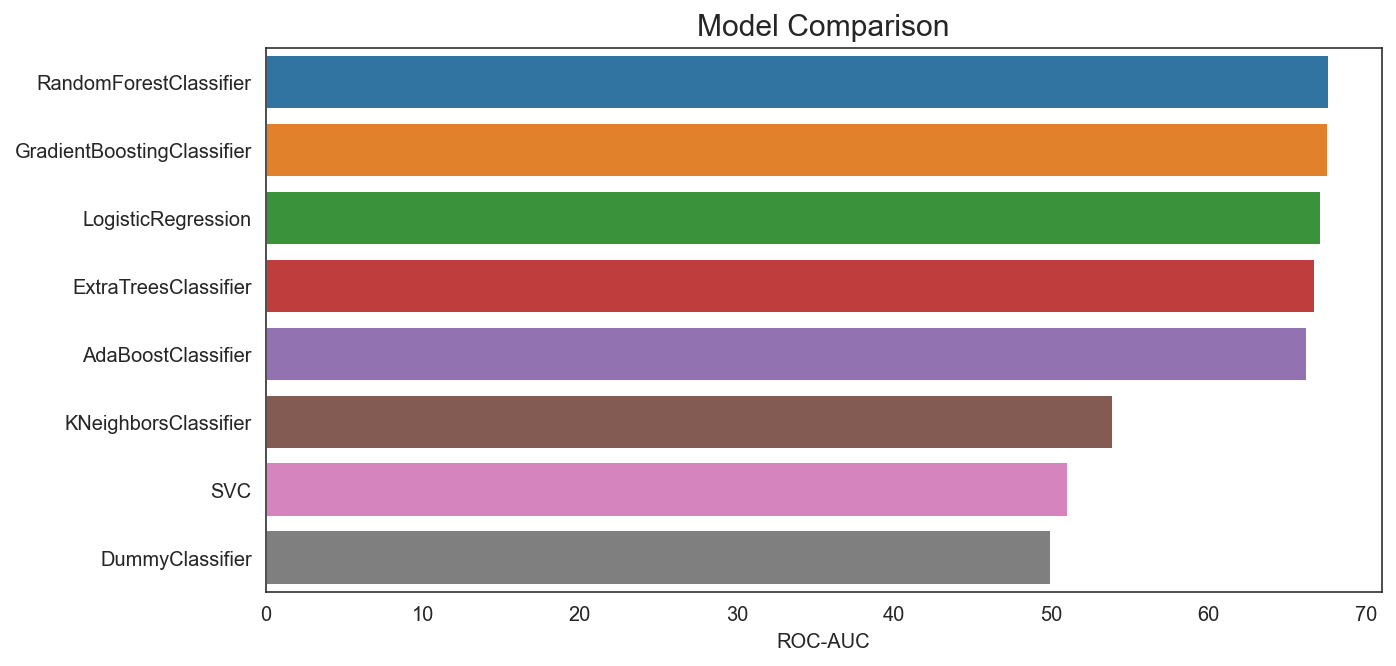

In [60]:
plt.figure(figsize=(10,5))
plt.title('Model Comparison', size=15)
sns.barplot(data=testohe_results, x='ROC-AUC', y=testohe_results.index)

In [61]:
# Define data preprocessing tools
imp = SimpleImputer(strategy='constant', fill_value='unknown')
ohe = OneHotEncoder(handle_unknown='ignore')

# Define cat preprocessing
cat_preprocessor = Pipeline([
    ('impute', imp),
    ('ohe_encode', ohe)
])

# Define num preprocessing
num_preprocessor = StandardScaler()

# Combine num and cat preprocessing
ct = ColumnTransformer([
    ('cat', cat_preprocessor, cat_cols),
    ('num', num_preprocessor, num_cols)])

# Define Models
models = [DummyClassifier(strategy='constant', random_state=999, constant=1),
          LogisticRegression(solver='liblinear', random_state=999),
          SVC(random_state=999),
          KNeighborsClassifier(),
          AdaBoostClassifier(random_state=999),
          ExtraTreesClassifier(random_state=999),
          RandomForestClassifier(random_state=999),
          GradientBoostingClassifier(random_state=999)]

scores = []
model_name = []

for model in models:
    # Define model pipeline
    pipe = Pipeline([('preprocessing', ct), ('model', model)])
    # Fit model pipeline
    pipe.fit(X_train, y_train)
    # Predict model pipeline
    y_pred = pipe.predict(X_test)
    # Append model name and scores
    model_name.append(model.__class__.__name__)
    scores.append(({
        'Accuracy': round(accuracy_score(y_test, y_pred) * 100, 3),
        'ROC-AUC': round(roc_auc_score(y_test, y_pred) * 100, 3),
        'Precision': round(precision_score(y_test, y_pred) * 100, 3),
        'Recall': round(recall_score(y_test, y_pred) * 100, 3)
    })) 
    # Print model and score
    print(f'Model: {model} and the test ROC-AUC score: {round(roc_auc_score(y_test, y_pred) * 100 , 3)}%')

Model: DummyClassifier(constant=1, random_state=999, strategy='constant') and the test ROC-AUC score: 50.0%
Model: LogisticRegression(random_state=999, solver='liblinear') and the test ROC-AUC score: 67.14%
Model: SVC(random_state=999) and the test ROC-AUC score: 68.723%
Model: KNeighborsClassifier() and the test ROC-AUC score: 64.551%
Model: AdaBoostClassifier(random_state=999) and the test ROC-AUC score: 66.262%
Model: ExtraTreesClassifier(random_state=999) and the test ROC-AUC score: 66.793%
Model: RandomForestClassifier(random_state=999) and the test ROC-AUC score: 67.884%
Model: GradientBoostingClassifier(random_state=999) and the test ROC-AUC score: 67.599%


In [62]:
testohescl_results = pd.DataFrame(data=scores, columns=['Accuracy', 'ROC-AUC', 'Precision', 'Recall'], index=model_name)
testohescl_results.sort_values(by=['ROC-AUC'], ascending=False, inplace=True)

<AxesSubplot:title={'center':'Model Comparison'}, xlabel='ROC-AUC'>

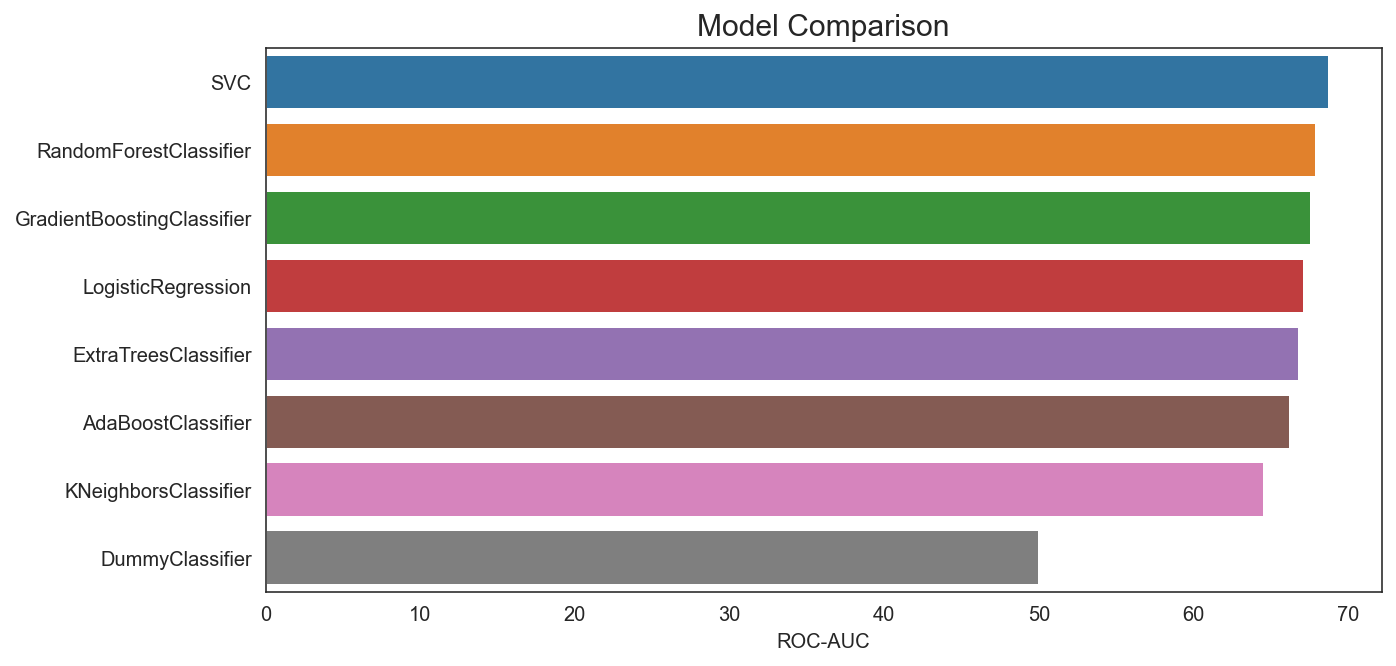

In [63]:
plt.figure(figsize=(10,5))
plt.title('Model Comparison', size=15)
sns.barplot(data=testohescl_results, x='ROC-AUC', y=testohescl_results.index)

## Feature Engineering

In [64]:
df.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,2021-11-09 13:45:20,2021-11-09 13:46:30,0
2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,2021-11-09 14:49:03,2021-11-09 14:52:08,0
3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,2021-11-09 16:30:24,2021-11-09 16:36:04,1
4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,2021-11-09 12:06:43,2021-11-09 12:20:22,1
5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,2021-11-09 14:35:44,2021-11-09 14:38:56,0


In [65]:
df['CallDuration'] = (df['CallEnd'] - df['CallStart']).dt.total_seconds()
df['CallHourStart'] = df['CallStart'].apply(lambda t: t.hour)
df['CallMinStart'] = df['CallStart'].apply(lambda t: t.minute)
df.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,CallDuration,CallHourStart,CallMinStart
Id,,,,,,,,,,,,,,,,,,,,,
1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,2021-11-09 13:45:20,2021-11-09 13:46:30,0,70.0,13,45
2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,2021-11-09 14:49:03,2021-11-09 14:52:08,0,185.0,14,49
3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,2021-11-09 16:30:24,2021-11-09 16:36:04,1,340.0,16,30
4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,2021-11-09 12:06:43,2021-11-09 12:20:22,1,819.0,12,6
5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,2021-11-09 14:35:44,2021-11-09 14:38:56,0,192.0,14,35


    - Let's visualize the new features we created.

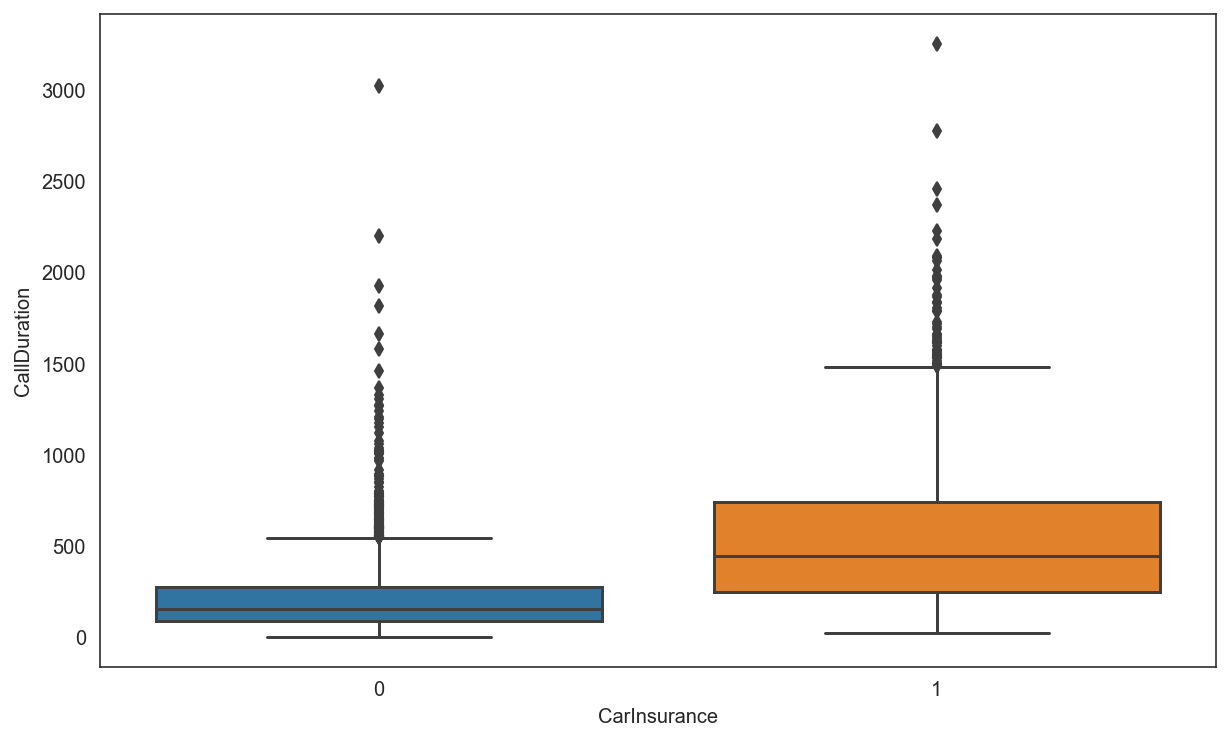

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x=df['CarInsurance'], y=df['CallDuration']);

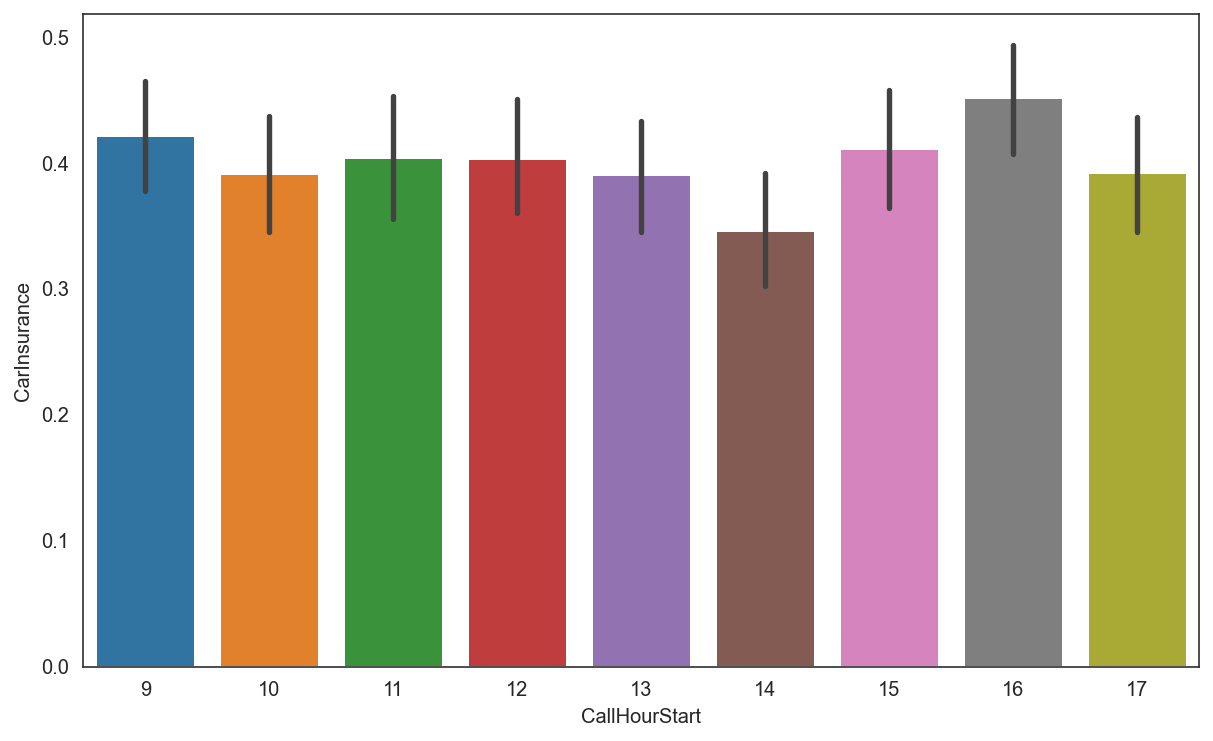

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(df['CallHourStart'], df['CarInsurance']);

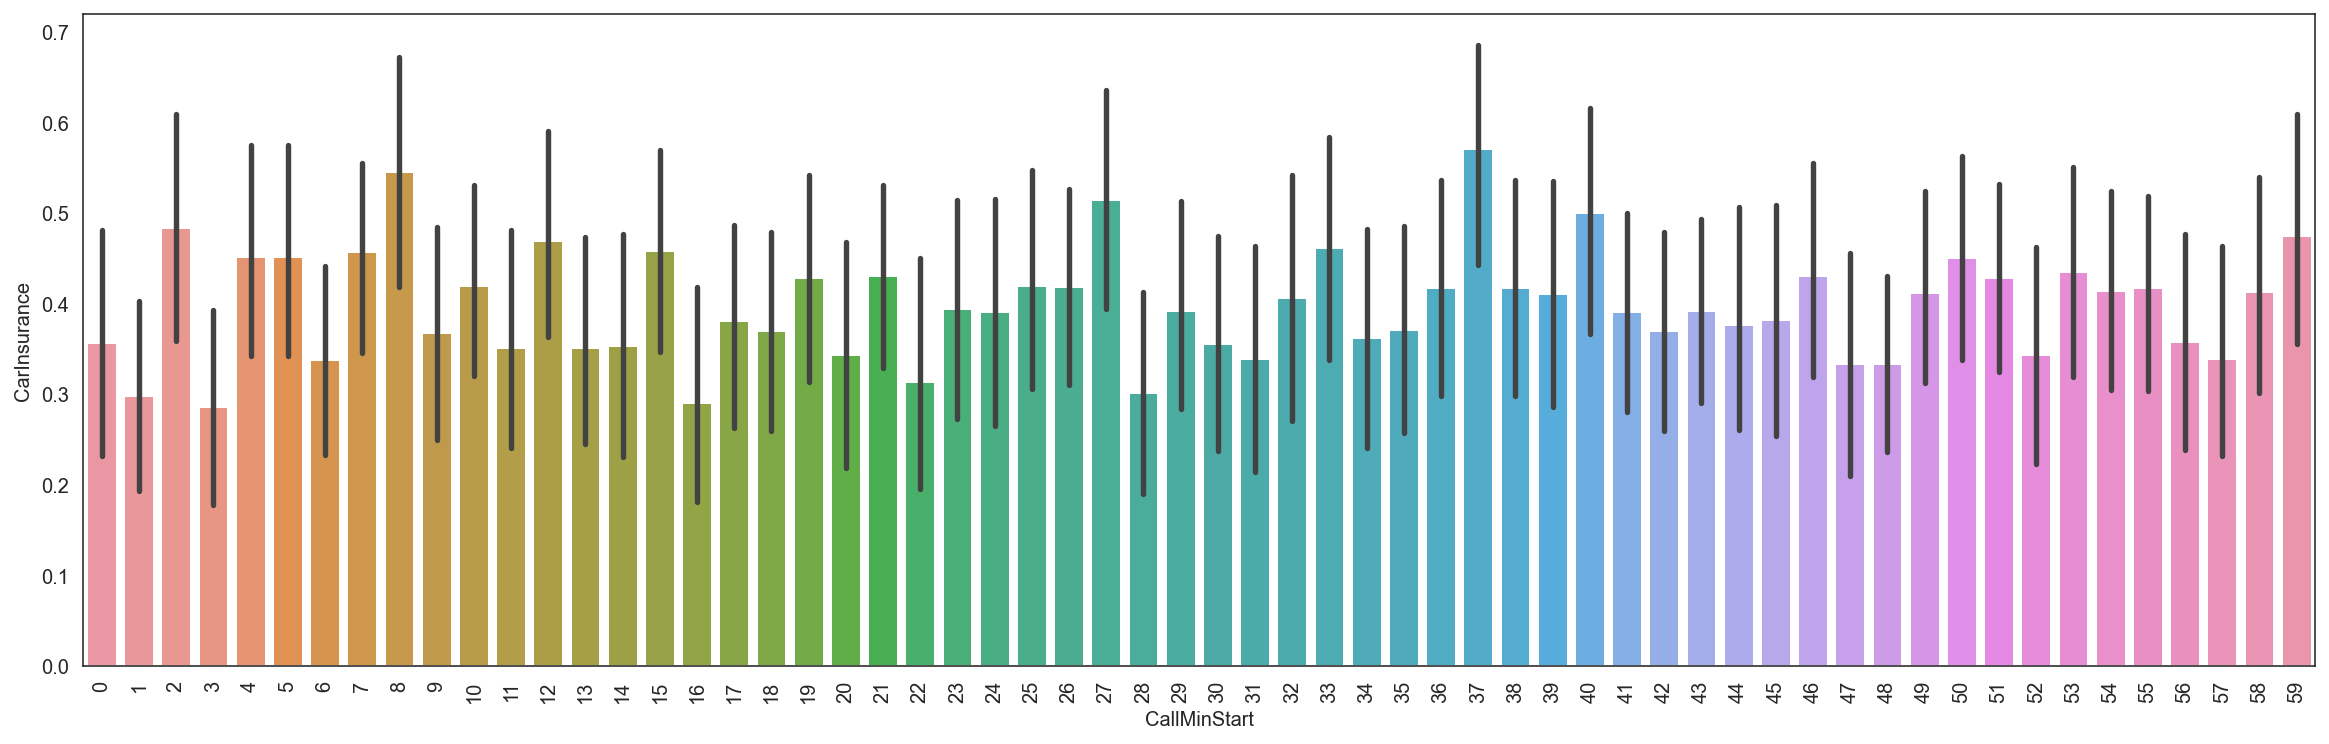

In [68]:
plt.figure(figsize=(20,6))
sns.barplot(df['CallMinStart'], df['CarInsurance'])
plt.xticks(rotation=90);

In [69]:
df.shape

(4000, 21)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Age               4000 non-null   int64         
 1   Job               3981 non-null   object        
 2   Marital           4000 non-null   object        
 3   Education         3831 non-null   object        
 4   Default           4000 non-null   int64         
 5   Balance           4000 non-null   int64         
 6   HHInsurance       4000 non-null   int64         
 7   CarLoan           4000 non-null   int64         
 8   Communication     3098 non-null   object        
 9   LastContactDay    4000 non-null   int64         
 10  LastContactMonth  4000 non-null   object        
 11  NoOfContacts      4000 non-null   int64         
 12  DaysPassed        4000 non-null   int64         
 13  PrevAttempts      4000 non-null   int64         
 14  Outcome           958 no

In [71]:
X = df.drop(columns=['CallStart', 'CallEnd', 'CarInsurance'])
y = df['CarInsurance']
print('The shape of X:', X.shape)
print('The shape of y:', y.shape)

The shape of X: (4000, 18)
The shape of y: (4000,)


In [72]:
num_selector = selector(dtype_exclude=object)
num_cols = num_selector(X)

cat_selector = selector(dtype_include=object)
cat_cols = cat_selector(X)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=999)

In [74]:
# Define data preprocessing tools
imp = SimpleImputer(strategy='constant', fill_value='unknown')
ohe = OneHotEncoder(handle_unknown='ignore')

# Define cat preprocessing
cat_preprocessor = Pipeline([
    ('impute', imp),
    ('ohe_encode', ohe)
])

# Combine num and cat preprocessing
ct = ColumnTransformer([
    ('cat', cat_preprocessor, cat_cols)],
    remainder = 'passthrough')
 
# Define models
models = [DummyClassifier(strategy='constant', random_state=999, constant=1),
          LogisticRegression(solver='liblinear', random_state=999),
          SVC(random_state=999),
          KNeighborsClassifier(),
          AdaBoostClassifier(random_state=999),
          ExtraTreesClassifier(random_state=999),
          RandomForestClassifier(random_state=999),
          GradientBoostingClassifier(random_state=999)]

scores = []
model_name = []

for model in models:
    # Define model pipeline
    pipe = Pipeline([('preprocessing', ct), ('model', model)])
    # Fit model pipeline
    pipe.fit(X_train, y_train)
    # Predict model pipeline
    y_pred = pipe.predict(X_test)
    # Append model name and score
    model_name.append(model.__class__.__name__)
    scores.append(({
        'Accuracy': round(accuracy_score(y_test, y_pred) * 100, 3),
        'ROC-AUC': round(roc_auc_score(y_test, y_pred) * 100, 3),
        'Precision': round(precision_score(y_test, y_pred) * 100, 3),
        'Recall': round(recall_score(y_test, y_pred) * 100, 3)
    })) 
    # Print model and score
    print(f'Model: {model} and the test ROC-AUC score: {round(roc_auc_score(y_test, y_pred) * 100 , 3)}%')

Model: DummyClassifier(constant=1, random_state=999, strategy='constant') and the test ROC-AUC score: 50.0%
Model: LogisticRegression(random_state=999, solver='liblinear') and the test ROC-AUC score: 77.156%
Model: SVC(random_state=999) and the test ROC-AUC score: 70.509%
Model: KNeighborsClassifier() and the test ROC-AUC score: 72.406%
Model: AdaBoostClassifier(random_state=999) and the test ROC-AUC score: 76.822%
Model: ExtraTreesClassifier(random_state=999) and the test ROC-AUC score: 78.028%
Model: RandomForestClassifier(random_state=999) and the test ROC-AUC score: 81.141%
Model: GradientBoostingClassifier(random_state=999) and the test ROC-AUC score: 81.724%


In [75]:
testohe_results2 = pd.DataFrame(data=scores, columns=['Accuracy', 'ROC-AUC', 'Precision', 'Recall'], index=model_name)
testohe_results2.sort_values(by=['ROC-AUC'], ascending=False, inplace=True)

<AxesSubplot:title={'center':'Model Comparison'}, xlabel='ROC-AUC'>

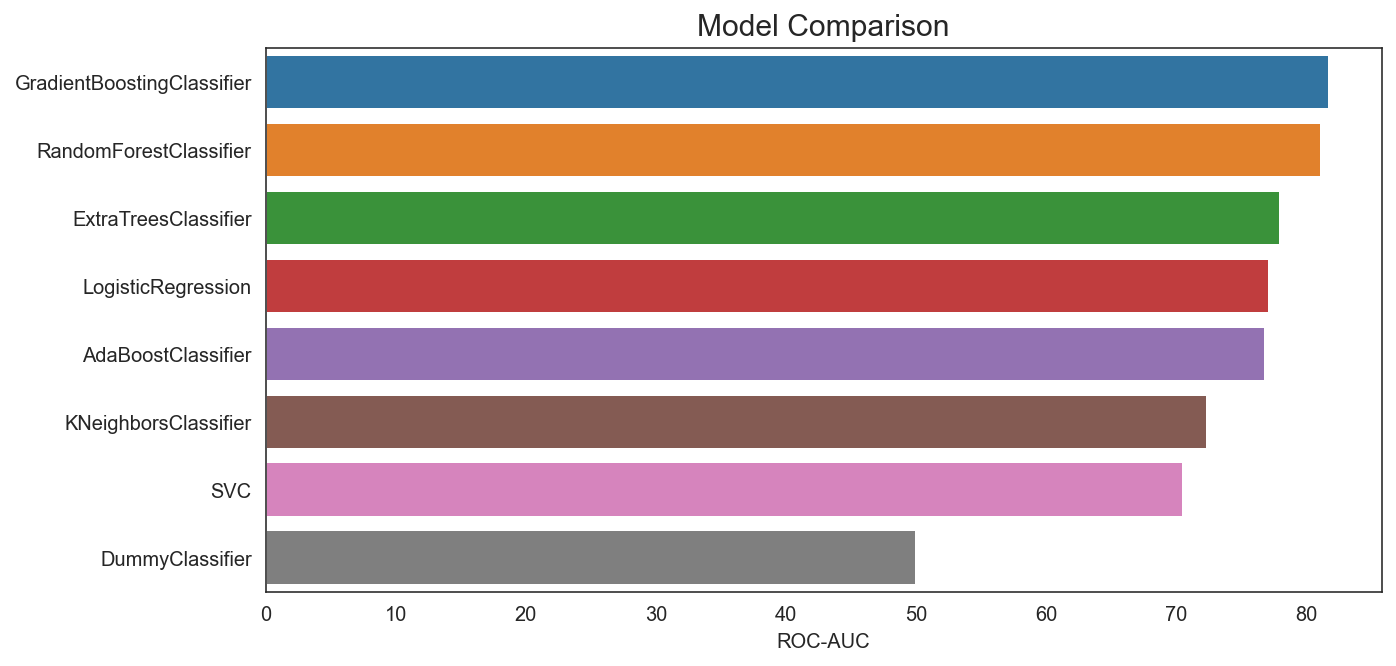

In [76]:
plt.figure(figsize=(10,5))
plt.title('Model Comparison', size=15)
sns.barplot(data=testohe_results2, x='ROC-AUC', y=testohe_results2.index)

In [77]:
# Define data preprocessing tools
imp = SimpleImputer(strategy='constant', fill_value='unknown')
ohe = OneHotEncoder(handle_unknown='ignore')

# Define cat preprocessing
cat_preprocessor = Pipeline([
    ('impute', imp),
    ('ohe_encode', ohe)
])

# Define num preprocessing
num_preprocessor = StandardScaler()

# Combine cat and num preprocessing
ct = ColumnTransformer([
    ('cat', cat_preprocessor, cat_cols),
    ('num', num_preprocessor, num_cols)])

# Define models
models = [DummyClassifier(strategy='constant', random_state=999, constant=1),
          LogisticRegression(solver='liblinear', random_state=999),
          SVC(random_state=999),
          KNeighborsClassifier(),
          AdaBoostClassifier(random_state=999),
          ExtraTreesClassifier(random_state=999),
          RandomForestClassifier(random_state=999),
          GradientBoostingClassifier(random_state=999)]

scores = []
model_name = []

for model in models:
    # Define model pipeline
    pipe = Pipeline([('preprocessing', ct), ('model', model)])
    # Fit model pipeline
    pipe.fit(X_train, y_train)
    # Predict model pipeline
    y_pred = pipe.predict(X_test)
    # Append model name and scores
    model_name.append(model.__class__.__name__)
    scores.append(({
        'Accuracy': round(accuracy_score(y_test, y_pred) * 100, 3),
        'ROC-AUC': round(roc_auc_score(y_test, y_pred) * 100, 3),
        'Precision': round(precision_score(y_test, y_pred) * 100, 3),
        'Recall': round(recall_score(y_test, y_pred) * 100, 3)
    })) 
    # Print model and score
    print(f'Model: {model} and the test ROC-AUC score: {round(roc_auc_score(y_test, y_pred) * 100 , 3)}%')

Model: DummyClassifier(constant=1, random_state=999, strategy='constant') and the test ROC-AUC score: 50.0%
Model: LogisticRegression(random_state=999, solver='liblinear') and the test ROC-AUC score: 77.031%
Model: SVC(random_state=999) and the test ROC-AUC score: 79.395%
Model: KNeighborsClassifier() and the test ROC-AUC score: 72.666%
Model: AdaBoostClassifier(random_state=999) and the test ROC-AUC score: 76.822%
Model: ExtraTreesClassifier(random_state=999) and the test ROC-AUC score: 78.028%
Model: RandomForestClassifier(random_state=999) and the test ROC-AUC score: 81.141%
Model: GradientBoostingClassifier(random_state=999) and the test ROC-AUC score: 81.724%


In [78]:
testohescl_results2 = pd.DataFrame(data=scores, columns=['Accuracy', 'ROC-AUC', 'Precision', 'Recall'], index=model_name)
testohescl_results2.sort_values(by=['ROC-AUC'], ascending=False, inplace=True)

<AxesSubplot:title={'center':'Model Comparison'}, xlabel='ROC-AUC'>

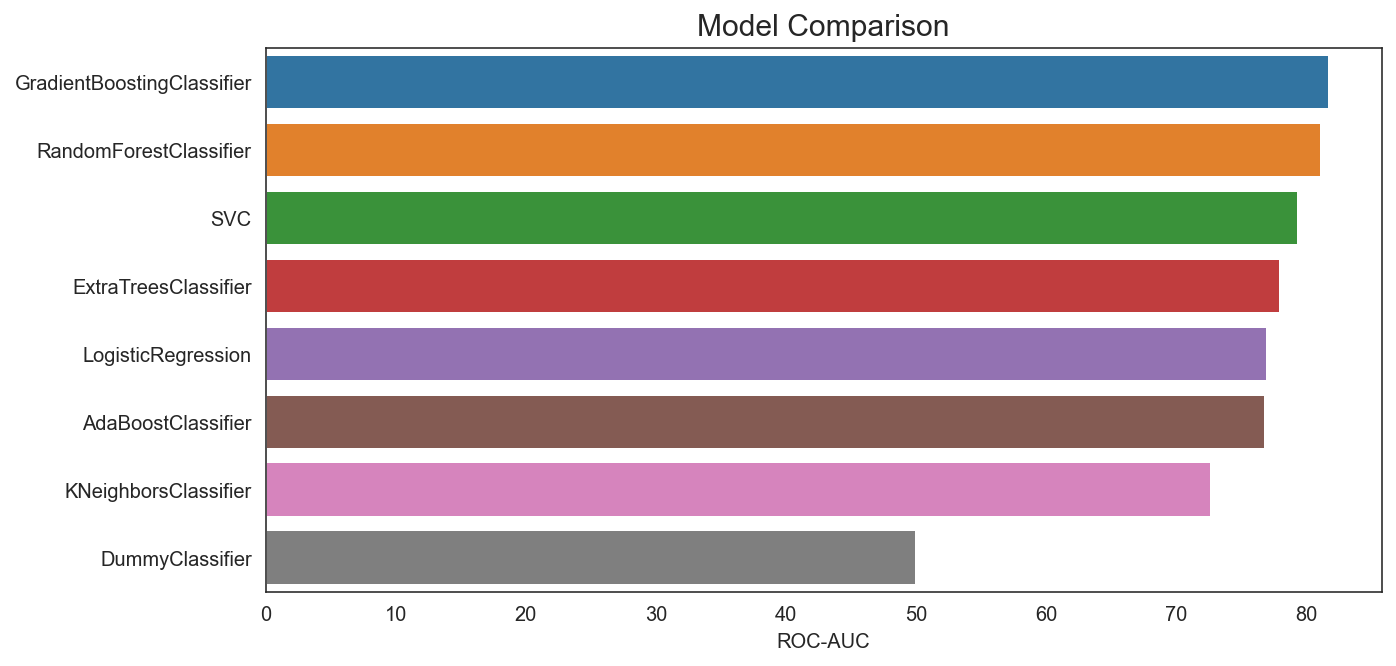

In [79]:
plt.figure(figsize=(10,5))
plt.title('Model Comparison', size=15)
sns.barplot(data=testohescl_results2, x='ROC-AUC', y=testohescl_results2.index)

## Best Model - Gradient Boosting

In [80]:
%%time

# Define data preprocessing tools
imp = SimpleImputer(strategy='constant', fill_value='unknown')
ohe = OneHotEncoder(handle_unknown='ignore')

# Define cat preprocessing
cat_preprocessor = Pipeline([
    ('impute', imp),
    ('ohe_encode', ohe)
])

# Define num preprocessing
num_preprocessor = StandardScaler()

# Combine cat and num preprocessing
ct = ColumnTransformer([
    ('cat', cat_preprocessor, cat_cols),
    ('num', num_preprocessor, num_cols)])

# Define best model pipeline 
gbc_pipe = Pipeline([
    ('preprocessing', ct),
    ('model', GradientBoostingClassifier(random_state=999))
])

# Define model evaluation strategy
cv_kfold = KFold(n_splits=10, shuffle=True, random_state=999)
metric = 'roc_auc'

# Evaluate model pipeline 
cv_score = cross_val_score(gbc_pipe,
                           X_train, y_train,
                           scoring=metric,
                           cv=cv_kfold,
                           n_jobs=-1,
                           verbose=0,
                           error_score='raise')

print(f'The mean CV ROC-AUC score: {(cv_score.mean() * 100):.3f}% +/- {(cv_score.std() * 100):.3f} std')

The mean CV ROC-AUC score: 92.583% +/- 1.720 std
CPU times: user 124 ms, sys: 97.1 ms, total: 221 ms
Wall time: 4.56 s


In [81]:
# gbc_pipe.get_params()

### Tune Best Model Parameters

In [82]:
%%time

# Define model pipeline parameter grid
gbc_param_grid = {
    'model__n_estimators': range(50, 500, 50),
    'model__max_depth': range(1, 10)
}


gbc_gs = GridSearchCV(gbc_pipe,
                      param_grid=gbc_param_grid,
                      scoring=metric,
                      cv=cv_kfold,
                      n_jobs=-1,
                      verbose=1,
                      error_score='raise')

gbc_gs.fit(X_train, y_train);

Fitting 10 folds for each of 81 candidates, totalling 810 fits
CPU times: user 6.41 s, sys: 352 ms, total: 6.76 s
Wall time: 9min 59s


GridSearchCV(cv=KFold(n_splits=10, random_state=999, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(fill_value='unknown',
                                                                                                        strategy='constant')),
                                                                                         ('ohe_encode',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Job',
                                                                          'Marital',
     

### Evaluate Best Model

In [83]:
best_score = gbc_gs.best_score_
print(f'Best GridSearchCV ROC-AUC Score: {(best_score * 100):.3f}%')
print(f'Best Model Parameters: {gbc_gs.best_params_}')

Best GridSearchCV ROC-AUC Score: 92.951%
Best Model Parameters: {'model__max_depth': 3, 'model__n_estimators': 250}


In [84]:
print('Model Results:')
gbc_results = pd.DataFrame(gbc_gs.cv_results_)
gbc_results

Model Results:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.241468,0.014238,0.011898,0.001912,1,50,"{'model__max_depth': 1, 'model__n_estimators':...",0.892169,0.872416,0.902638,0.901190,0.875890,0.880419,0.891852,0.908218,0.860253,0.888111,0.887315,0.014288,81
1,0.410623,0.012437,0.013739,0.001320,1,100,"{'model__max_depth': 1, 'model__n_estimators':...",0.902878,0.885570,0.915037,0.919416,0.887908,0.892170,0.910087,0.919468,0.888245,0.906834,0.902761,0.012714,80
2,0.650486,0.010920,0.014316,0.001853,1,150,"{'model__max_depth': 1, 'model__n_estimators':...",0.908340,0.890203,0.920435,0.925701,0.892757,0.895840,0.918515,0.924144,0.900786,0.912469,0.908919,0.012648,78
3,0.896795,0.016401,0.015630,0.001189,1,200,"{'model__max_depth': 1, 'model__n_estimators':...",0.912946,0.894068,0.924319,0.928440,0.894233,0.897133,0.924372,0.928125,0.909399,0.918412,0.913145,0.013149,77
4,1.040540,0.041385,0.013691,0.000822,1,250,"{'model__max_depth': 1, 'model__n_estimators':...",0.913136,0.895092,0.927097,0.930011,0.894115,0.898102,0.928299,0.931505,0.914178,0.923929,0.915547,0.014212,76
5,1.220204,0.014622,0.014456,0.002003,1,300,"{'model__max_depth': 1, 'model__n_estimators':...",0.911807,0.895372,0.927368,0.930774,0.895099,0.898287,0.930963,0.931829,0.918130,0.926240,0.916587,0.014566,75
6,1.502219,0.025267,0.014947,0.001486,1,350,"{'model__max_depth': 1, 'model__n_estimators':...",0.912472,0.895837,0.928226,0.931403,0.894397,0.898933,0.932892,0.932477,0.920401,0.928221,0.917526,0.015053,74
7,1.674009,0.013680,0.016031,0.001807,1,400,"{'model__max_depth': 1, 'model__n_estimators':...",0.913374,0.895791,0.929852,0.931582,0.894631,0.898841,0.934592,0.933310,0.921064,0.929636,0.918267,0.015513,72
8,1.861452,0.020004,0.015858,0.002473,1,450,"{'model__max_depth': 1, 'model__n_estimators':...",0.912234,0.896489,0.930711,0.931672,0.893413,0.898518,0.935235,0.933634,0.921963,0.930532,0.918440,0.015940,71
9,0.389064,0.006364,0.013999,0.001321,2,50,"{'model__max_depth': 2, 'model__n_estimators':...",0.904588,0.891041,0.916437,0.923030,0.885518,0.892400,0.920605,0.925370,0.900147,0.911385,0.907052,0.013674,79


In [85]:
print('Best Model:')
gbc = gbc_gs.best_estimator_
gbc

Best Model:


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('ohe_encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Job', 'Marital',
                                                   'Education', 'Communication',
                                                   'LastContactMonth',
                                                   'Outcome']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Default', 'Bala

## Prediction on hold-out test set with Best Model

In [86]:
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
y_predprob = gbc.predict_proba(X_test)[: , 1]

#### ROC-AUC

In [87]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f'The ROC-AUC test score: {(roc_auc * 100):.3f}%')

The ROC-AUC test score: 81.932%


In [88]:
roc_auc_prob = roc_auc_score(y_test, y_predprob)
print(f'The ROC-AUC test score: {(roc_auc_prob * 100):.3f}%')

The ROC-AUC test score: 90.754%


#### Confusion Matrix

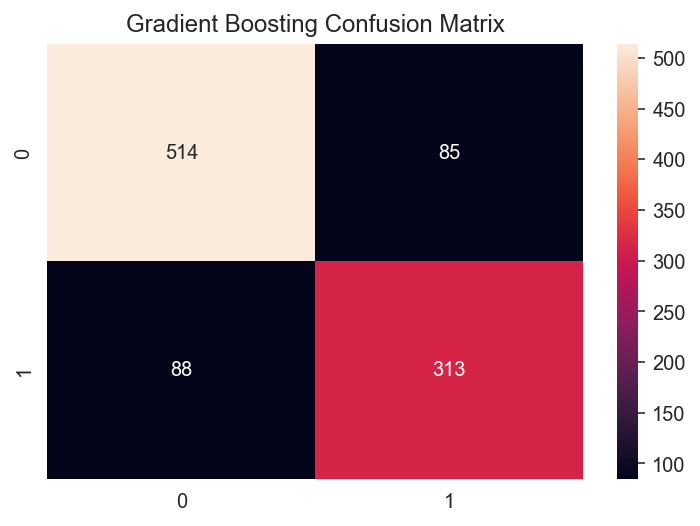

In [89]:
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.title('Gradient Boosting Confusion Matrix');

#### Classification Report

In [90]:
classification_report = classification_report(y_test, y_pred)
print(f'Gradient Boosting Classification Report:\n\n {classification_report}')

Gradient Boosting Classification Report:

               precision    recall  f1-score   support

           0       0.85      0.86      0.86       599
           1       0.79      0.78      0.78       401

    accuracy                           0.83      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.83      0.83      0.83      1000



#### Precision

In [91]:
precision = precision_score(y_test, y_pred)
print(f'The precision test score is: {(precision * 100):.3f}%')

The precision test score is: 78.643%


#### Recall

In [92]:
recall = recall_score(y_test, y_pred)
print(f'The recall test score is: {(recall * 100):.3f}%')

The recall test score is: 78.055%


#### CV ROC-AUC

In [93]:
%%time

outer_cv = KFold(n_splits=5, shuffle=True, random_state=999)

cv_score = cross_val_score(gbc,
                           X_train, y_train,
                           cv=outer_cv,
                           scoring='roc_auc',
                           n_jobs=-1,
                           error_score='raise')

print(f'The mean CV ROC-AUC score: {(cv_score.mean() * 100):.3f}% +/- {(cv_score.std() * 100):.3f} std')

The mean CV ROC-AUC score: 92.815% +/- 1.649 std
CPU times: user 159 ms, sys: 5.65 ms, total: 165 ms
Wall time: 1.55 s


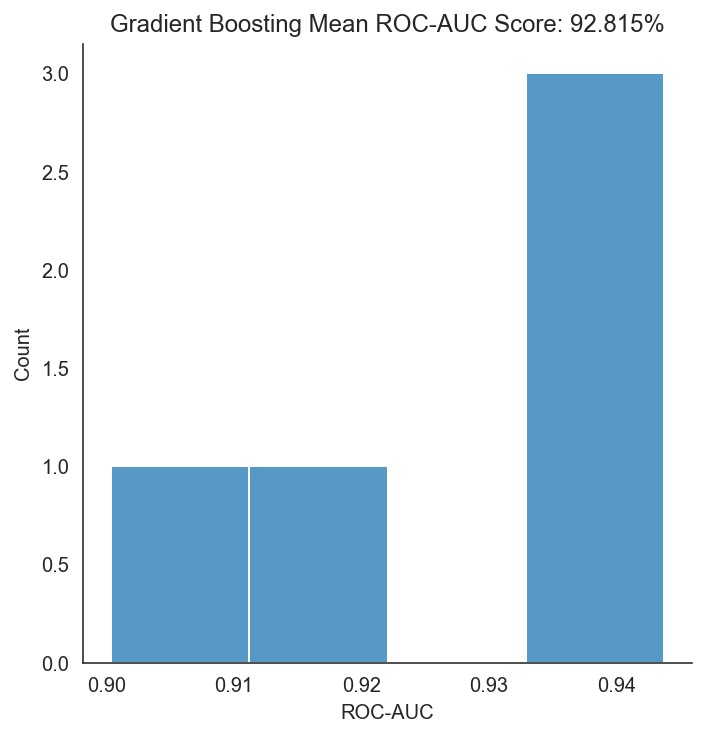

In [94]:
best_model_results = pd.DataFrame(cv_score, columns=['ROC-AUC'])
sns.displot(data=best_model_results, x='ROC-AUC')
plt.title(f'Gradient Boosting Mean ROC-AUC Score: {(cv_score.mean() * 100):.3f}%');

## Feature Importance

In [103]:
feature_importance = gbc.named_steps.model.feature_importances_
features = gbc.named_steps.preprocessing.get_feature_names
fi = {'Features': features,'FeatureImportance': feature_importance}
df_fi = pd.DataFrame(fi)
df_fi.sort_values(by=['FeatureImportance'], ascending=False, inplace=True)

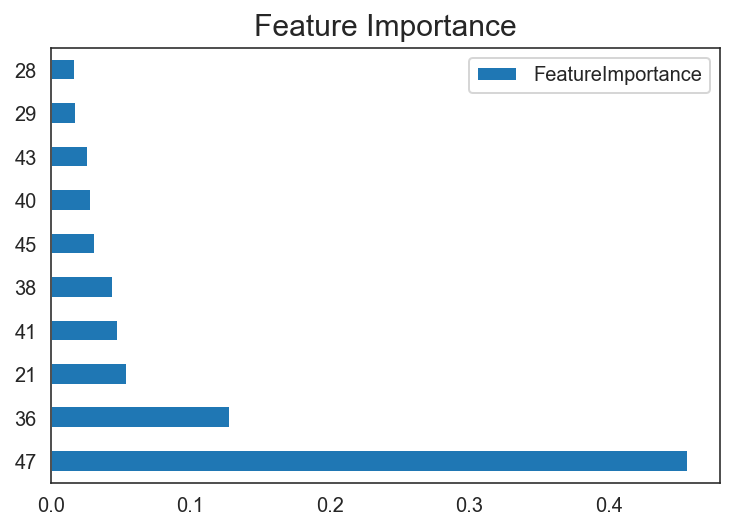

In [104]:
df_fi.nlargest(10, columns='FeatureImportance').plot(kind='barh')
plt.title('Feature Importance', size=15);

### Save Best Model

In [105]:
# Fit best model on all the data
gbc.fit(X, y);

In [106]:
import joblib
joblib.dump(gbc, 'car_insurance_model_v1.pkl', compress=1)
print('Best Model Saved!!')

Best Model Saved!!


## Conclusions

    - Overall, Gradient Boosting model mean CV ROC_AUC score is 92.815%.
    - On the hold-out test set, the best model (Gradient Boosting) gives a ROC-AUC score 81.932%, with a 90.754% ROC-AUC probability score, a 78.643% precision; and a 78.055% recall.
    


## Deploy Model on Unseen Data (aka test dataset)

#### Load Best Model

In [107]:
best_model = joblib.load('car_insurance_model_v1.pkl')
best_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('ohe_encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Job', 'Marital',
                                                   'Education', 'Communication',
                                                   'LastContactMonth',
                                                   'Outcome']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Default', 'Bala

#### Load Test Dataset

In [108]:
df = test.copy()

In [109]:
df.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
4001,25,admin.,single,secondary,0,1,1,1,NaN,12,may,12,-1,0,NaN,2021-11-09 17:17:42,2021-11-09 17:18:06,NaN
4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NaN,2021-11-09 09:13:44,2021-11-09 09:14:37,NaN
4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NaN,2021-11-09 15:24:07,2021-11-09 15:25:51,NaN
4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NaN,2021-11-09 09:43:44,2021-11-09 09:48:01,NaN
4005,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,NaN,2021-11-09 16:31:51,2021-11-09 16:34:22,NaN


In [110]:
df['CallDuration'] = (df['CallEnd'] - df['CallStart']).dt.total_seconds()
df['CallHourStart'] = df['CallStart'].apply(lambda t: t.hour)
df['CallMinStart'] = df['CallStart'].apply(lambda t: t.minute)

In [111]:
df.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,CallDuration,CallHourStart,CallMinStart
Id,,,,,,,,,,,,,,,,,,,,,
4001,25,admin.,single,secondary,0,1,1,1,NaN,12,may,12,-1,0,NaN,2021-11-09 17:17:42,2021-11-09 17:18:06,NaN,24.0,17,17
4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NaN,2021-11-09 09:13:44,2021-11-09 09:14:37,NaN,53.0,9,13
4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NaN,2021-11-09 15:24:07,2021-11-09 15:25:51,NaN,104.0,15,24
4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NaN,2021-11-09 09:43:44,2021-11-09 09:48:01,NaN,257.0,9,43
4005,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,NaN,2021-11-09 16:31:51,2021-11-09 16:34:22,NaN,151.0,16,31


In [112]:
df.shape

(1000, 21)

In [113]:
X_new = df.drop(columns=['CallStart', 'CallEnd', 'CarInsurance'])
print('The shape of X:', X_new.shape)

The shape of X: (1000, 18)


In [114]:
y_pred = best_model.predict(X_new)
final_predictions = pd.DataFrame({'Model Predictions': y_pred})
final_predictions[:25]

,Model Predictions
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,1
8,0
9,0


In [116]:
final_predictions.to_csv('car_insurance_predictions_v1.csv')
print('Final Predictions CSV file saved!!')

Final Predictions CSV file saved!!


## Reproducibility

In [117]:
%load_ext watermark
%watermark -a 'Rainier Goubault' -nmv --packages numpy,pandas,scipy,sklearn,matplotlib,seaborn

Author: Rainier Goubault

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.27.0

numpy     : 1.21.2
pandas    : 1.3.3
scipy     : 1.7.1
sklearn   : 0.24.2
matplotlib: 3.4.3
seaborn   : 0.11.2

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

